In [3]:
%matplotlib inline
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
from datetime import datetime, timedelta, date
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas.io.sql as pandasql

In [4]:
# setting up pgsql connection
CONFIG = configparser.ConfigParser()
CONFIG.read('db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [13]:
start_date = datetime.strptime('2017-09-14', '%Y-%m-%d')
end_date =  datetime.strptime('2017-11-07', '%Y-%m-%d')

sql = pg.SQL('SELECT DISTINCT analysis_id, report_name FROM ryu4.aggr_30min ORDER BY report_name')
routes = pandasql.read_sql(sql, con)
n_routes = len(routes)

## Total Observations Per Route By 24 Hour Period
Does not include weekends over the period of Sept 14 to Nov 7.

DT-0001.College-EB_Bathurst-to-University


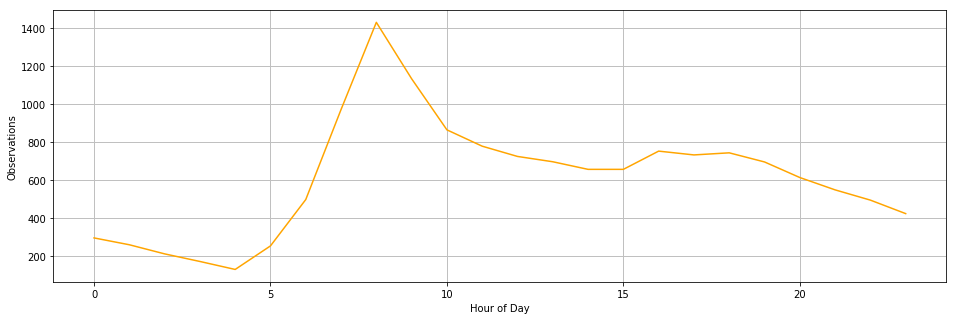

DT-0002. College-EB_University-to-Parliament


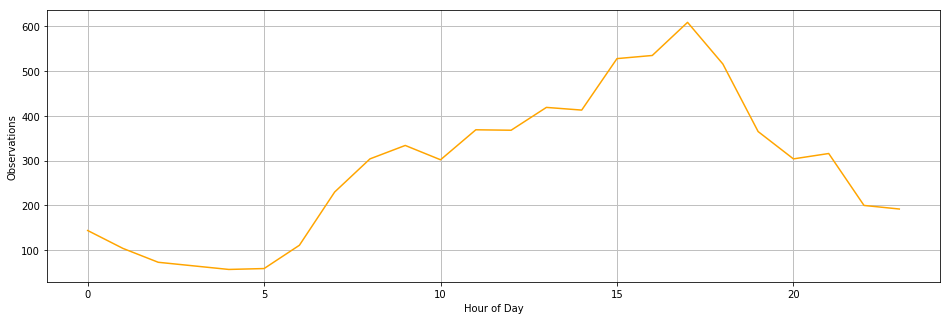

DT-0003. College-WB_Parliament-to-University


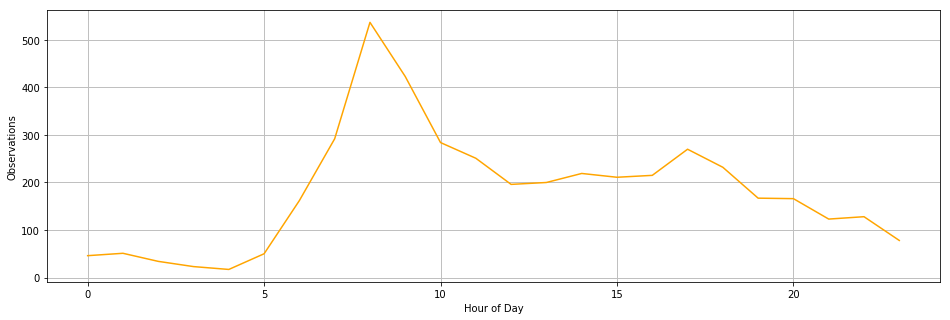

DT-0004. College-WB_University-to-Bathurst


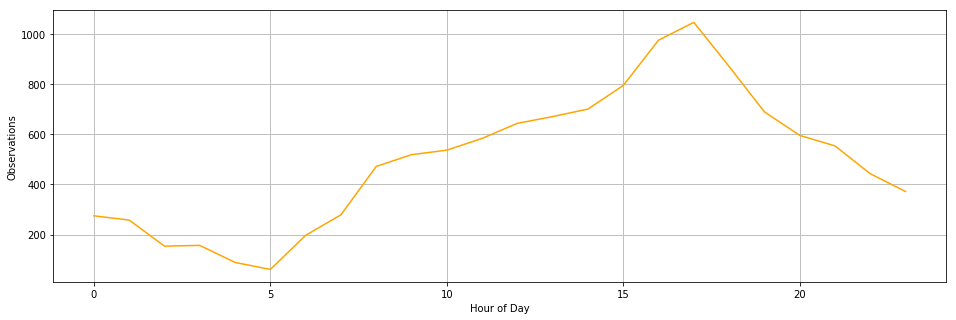

DT-0005. Dundas-EB_Roncesvalles-to-Dufferin


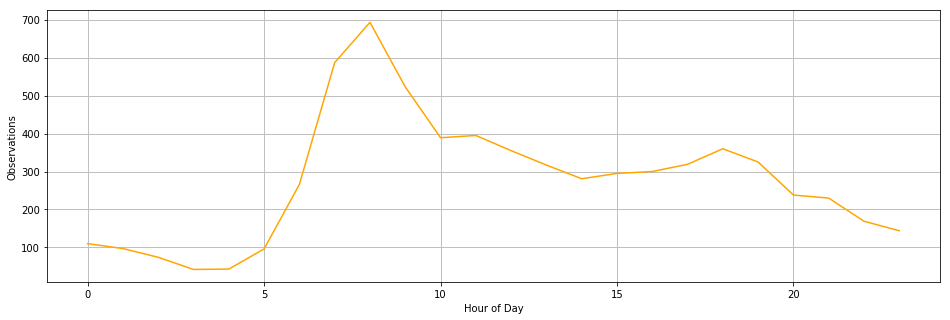

DT-0006. Dundas-EB_Dufferin-to-Bathurst


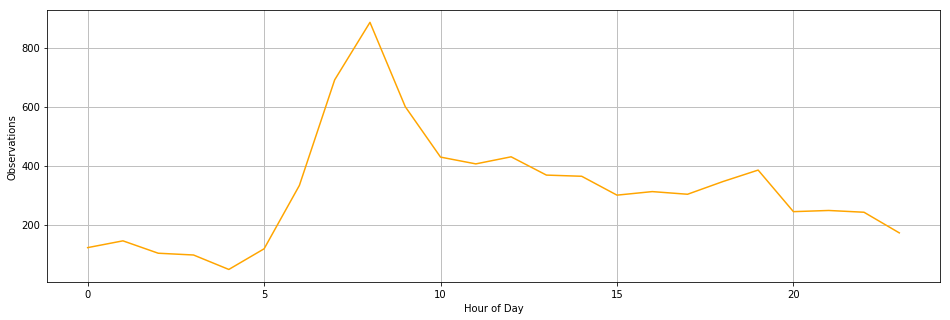

DT-0007. Dundas-EB_Bathurst-to-Spadina


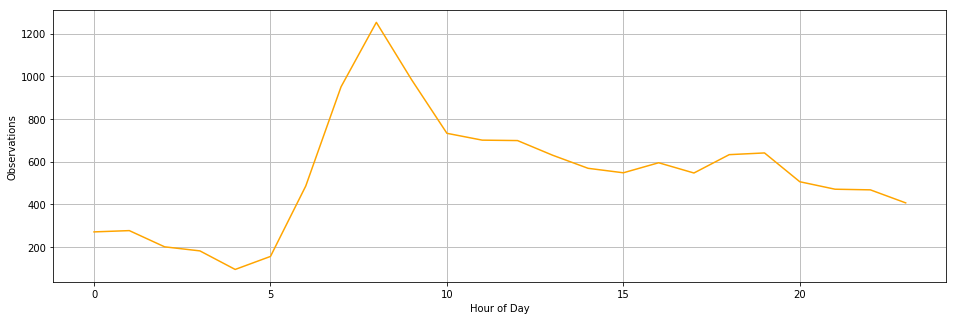

DT-0008. Dundas-EB_Spadina-to-University


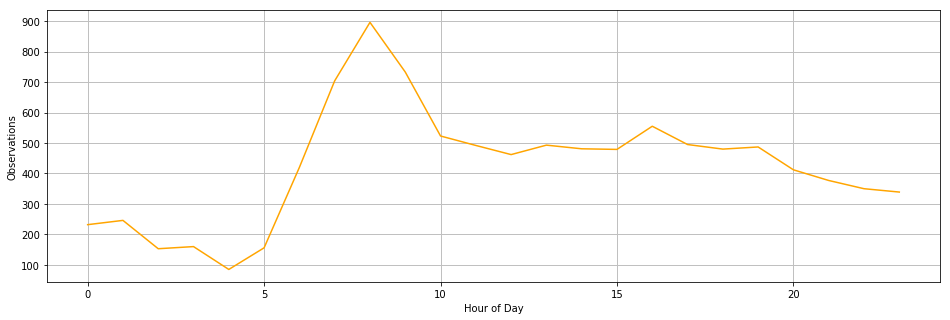

DT-0009. Dundas-EB_University-to-Yonge


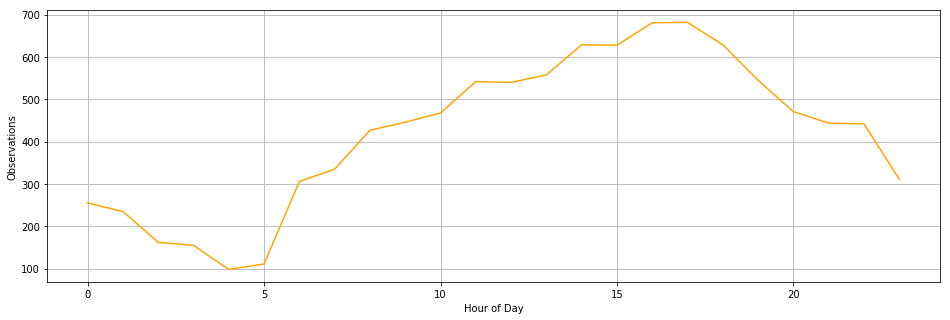

DT-0010. Dundas-EB_Yonge-to-Jarvis


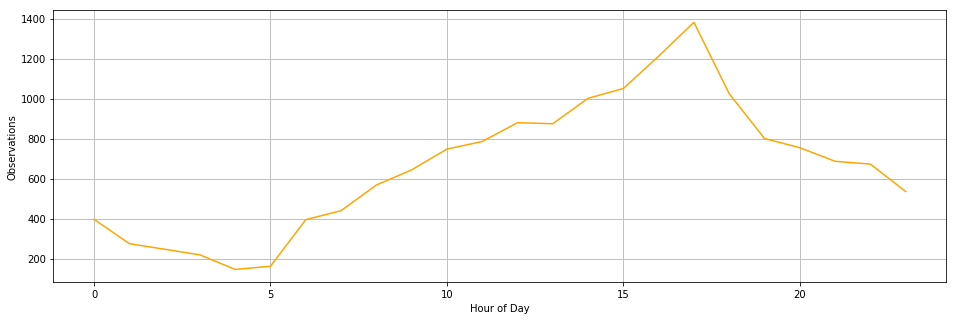

DT-0011. Dundas-EB_Jarvis-to-Parliament


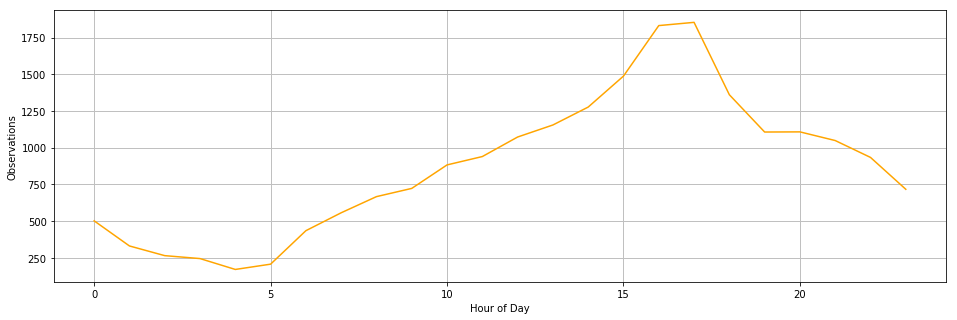

DT-0012. Dundas-WB_Parliament-to-Jarvis


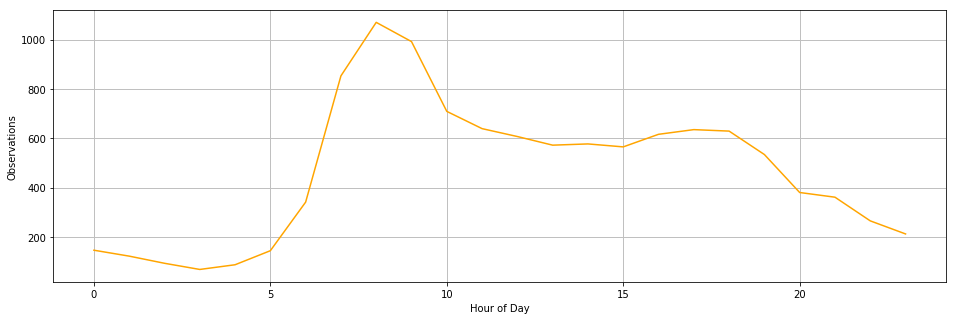

DT-0013. Dundas-WB_Jarvis-to-Yonge


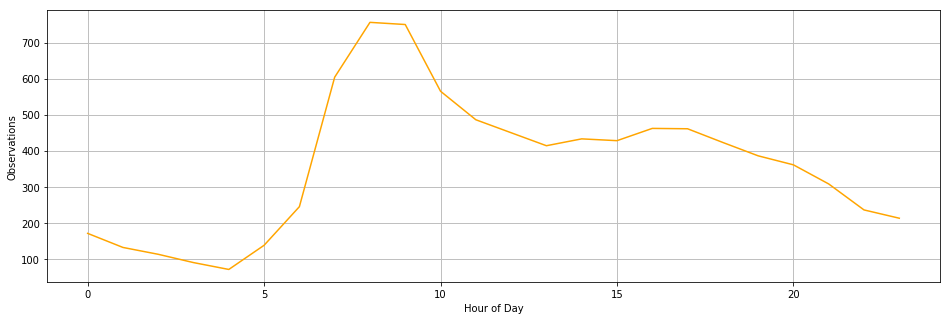

DT-0014. Dundas-WB_Yonge-to-University


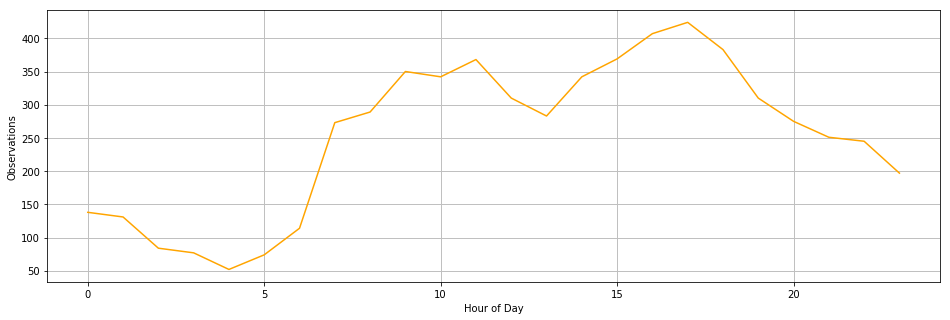

DT-0015. Dundas-WB_University-to-Spadina


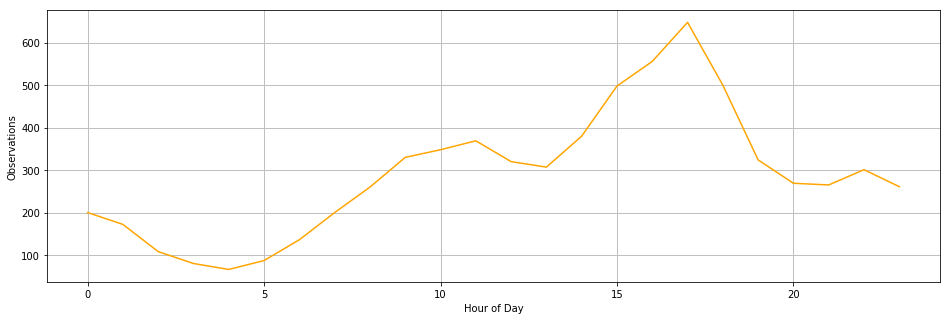

DT-0016. Dundas-WB_Spadina-to-Bathurst


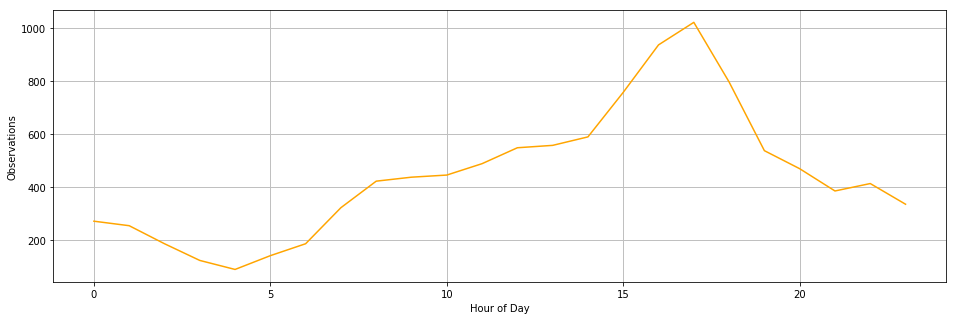

DT-0017. Dundas-WB_Bathurst-to-Dufferin


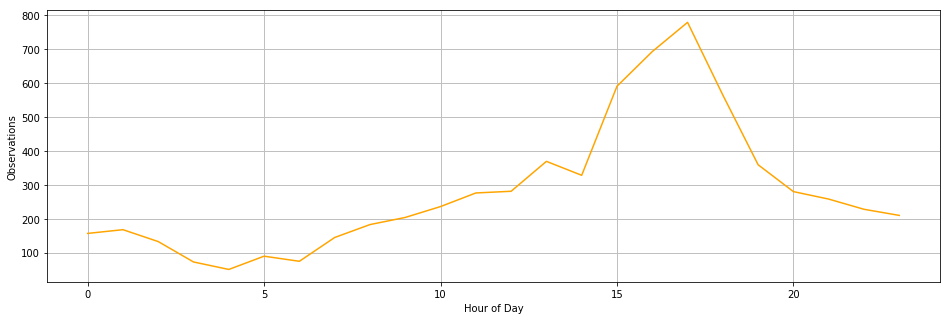

DT-0018. Dundas-WB_Dufferin-to-Roncesvalles


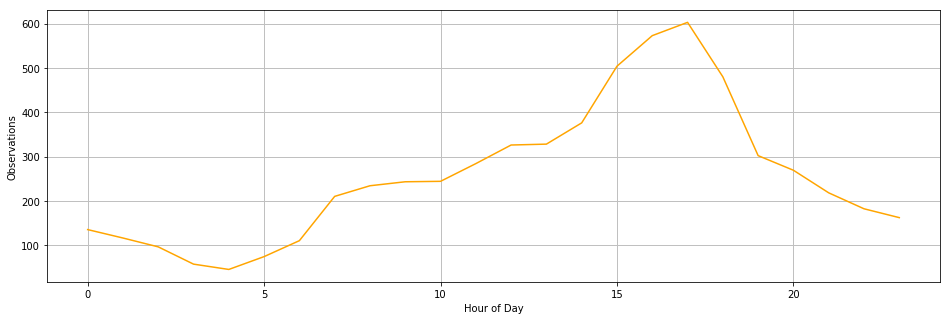

DT-0019. Queen-EB_Roncesvalles-to-Dufferin


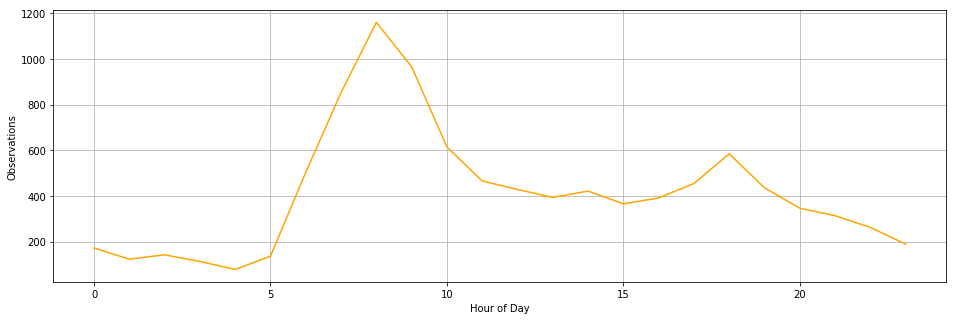

DT-0020. Queen-EB_Dufferin-to-Strachan


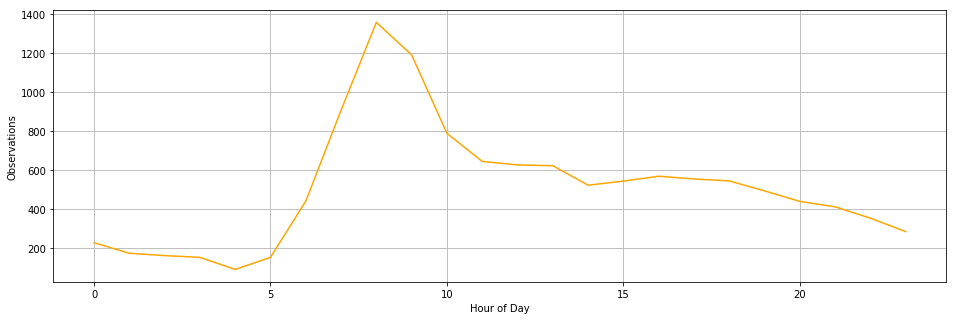

DT-0021. Queen-EB_Strachan-to-Bathurst


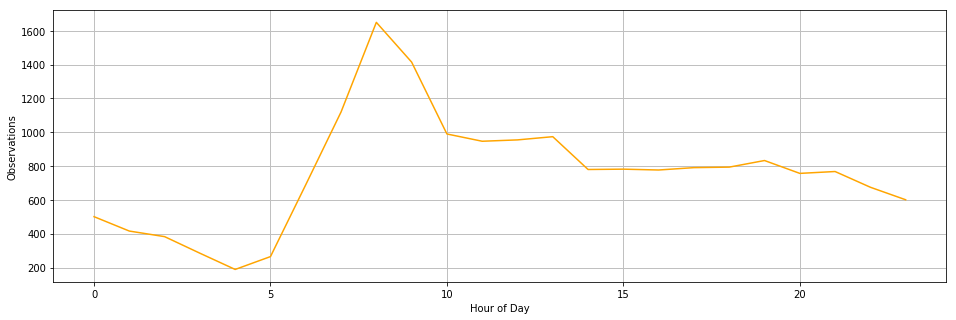

DT-0022. Queen-EB_Bathurst-to-Spadina


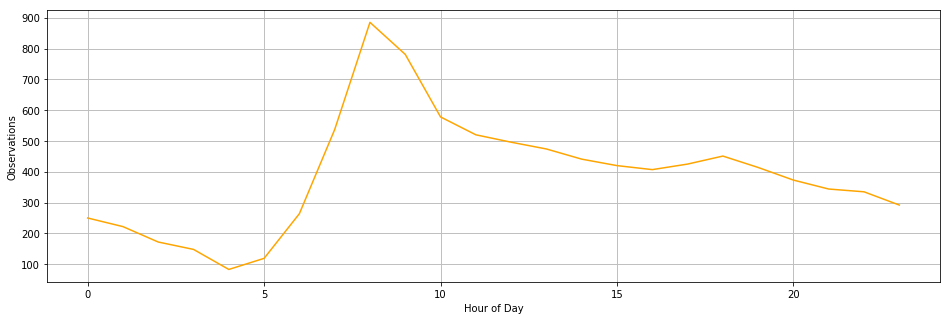

DT-0023. Queen-EB_Spadina-to-University


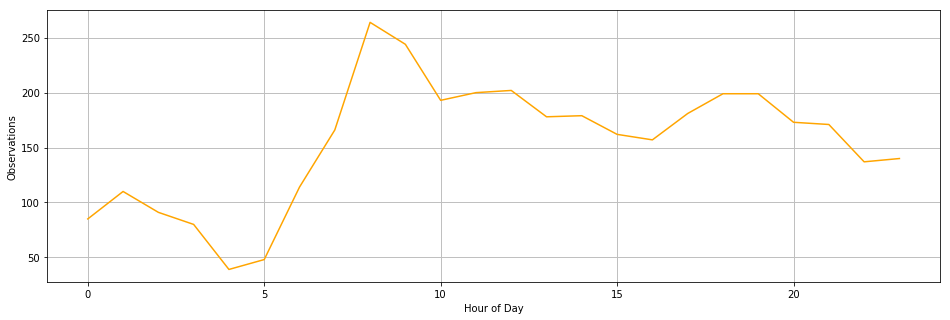

DT-0024. Queen-EB_University-to-Yonge


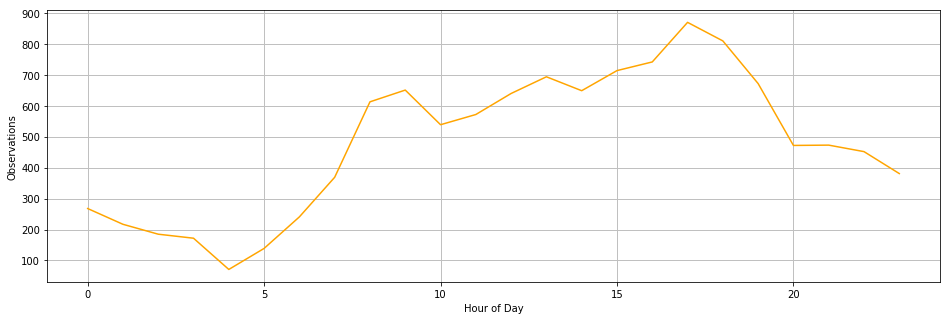

DT-0025. Queen-EB_Yonge-to-Jarvis


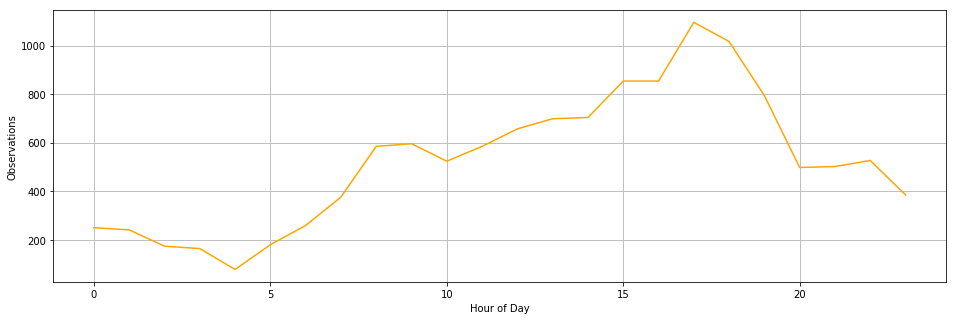

DT-0026. Queen-EB_Jarvis-to-Parliament


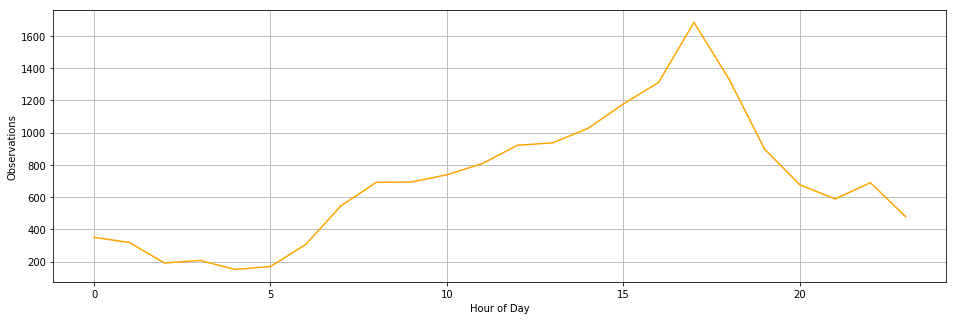

DT-0027. Queen-EB_Parliament-to-Broadview


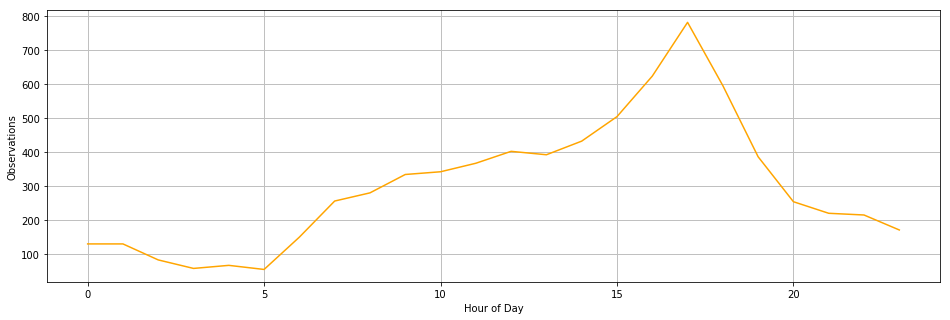

DT-0028. Queen-WB_Broadview-to-Parliament


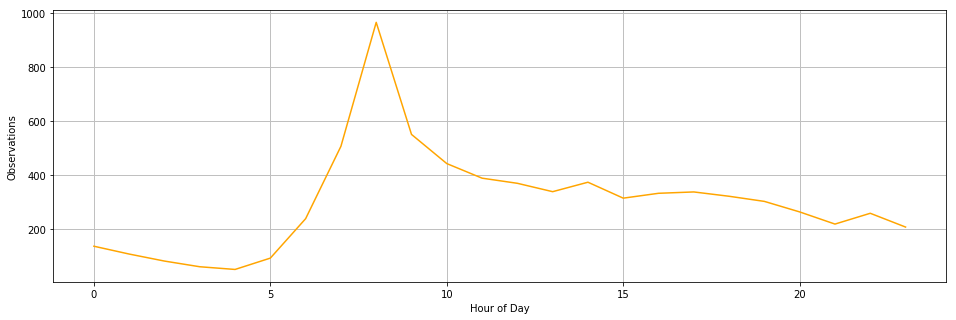

DT-0029. Queen-WB_Parliament-to-Jarvis


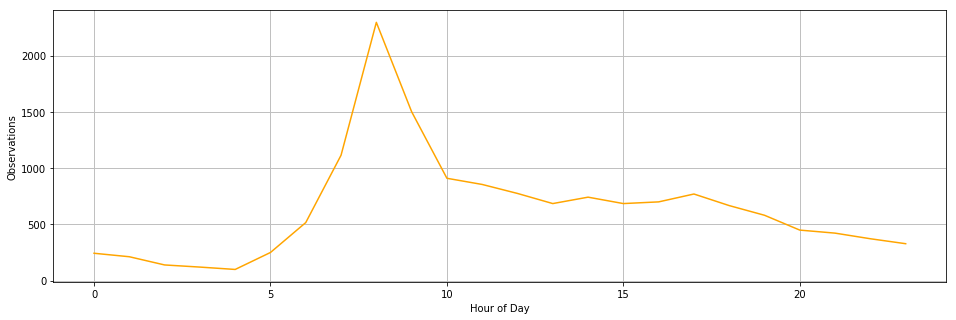

DT-0030. Queen-WB_Jarvis-to-Yonge


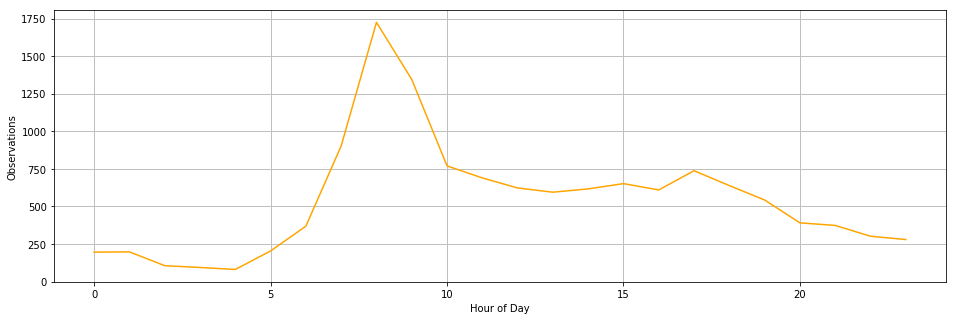

DT-0031. Queen-WB_Yonge-to-University


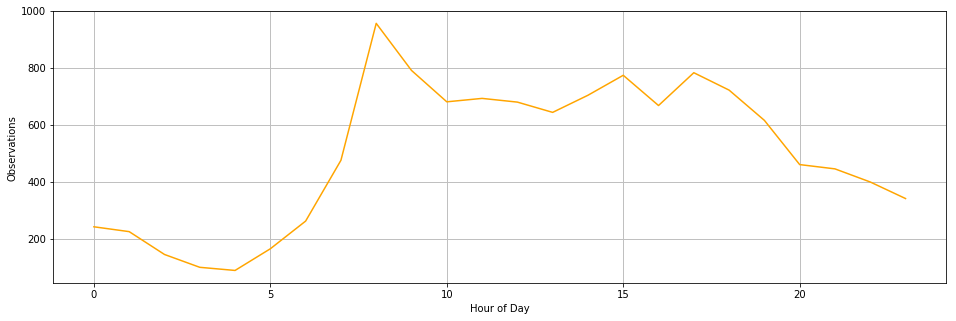

DT-0032. Queen-WB_University-to-Spadina


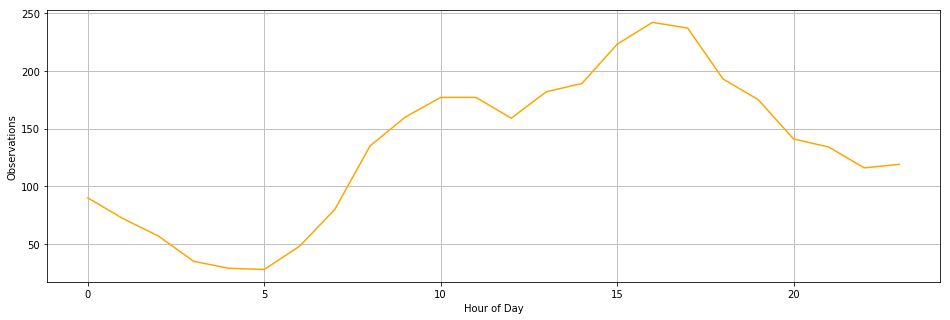

DT-0033. Queen-WB_Spadina-to-Bathurst


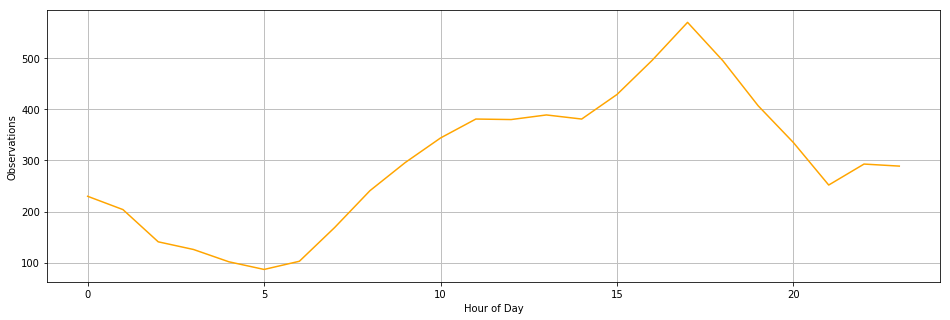

DT-0034. Queen-WB_Bathurst-to-Strachan


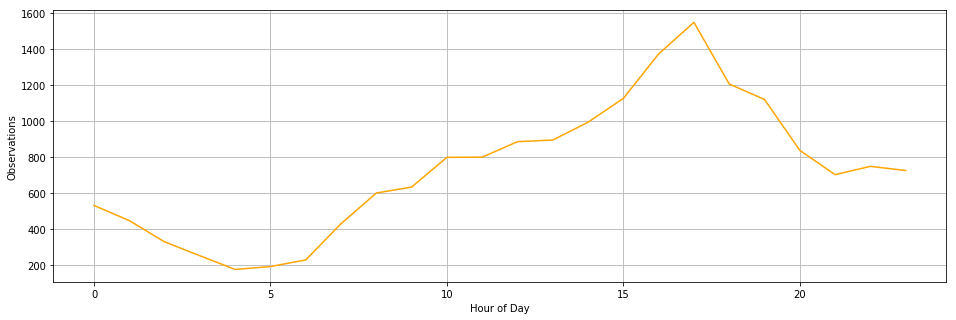

DT-0035. Queen-WB_Strachan-to-Dufferin


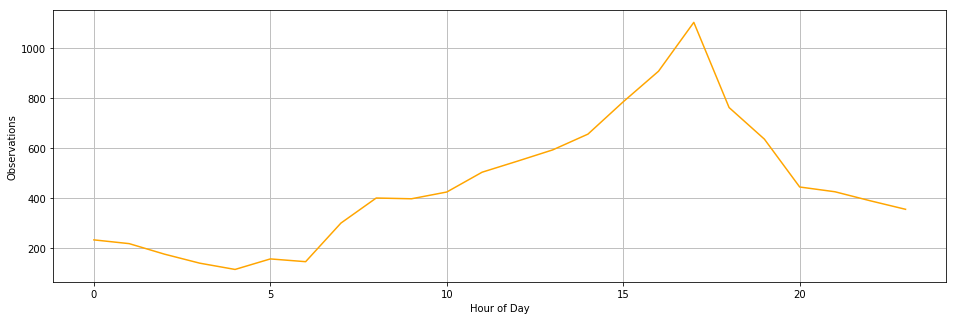

DT-0036. Queen-WB_Dufferin-to-Roncesvalles


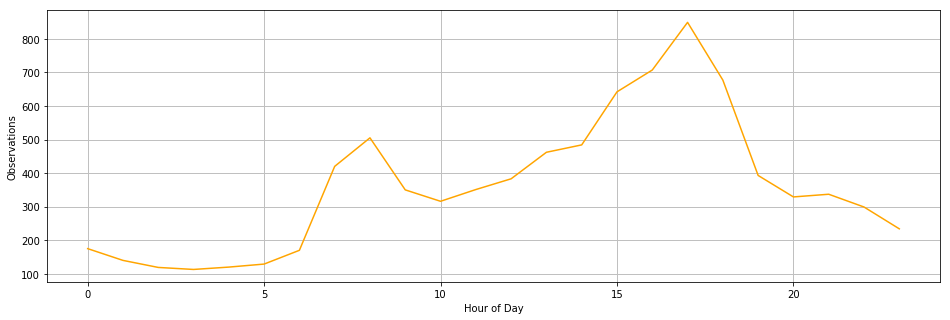

DT-0037. Eastern_Richmond-WB_Broadview-to-Parliament


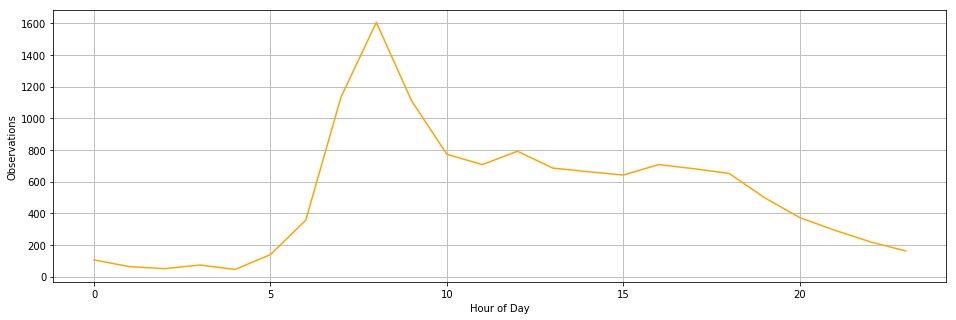

DT-0037. Eastern/Richmond-WB_Broadview-to-Parliament


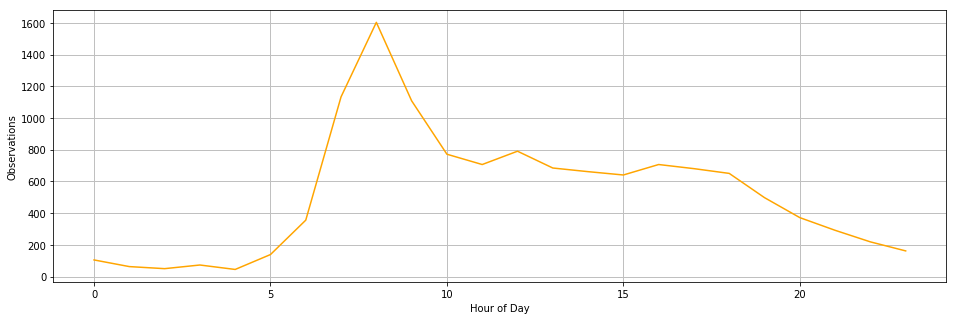

DT-0038. Richmond-WB_Parliament-to-Jarvis


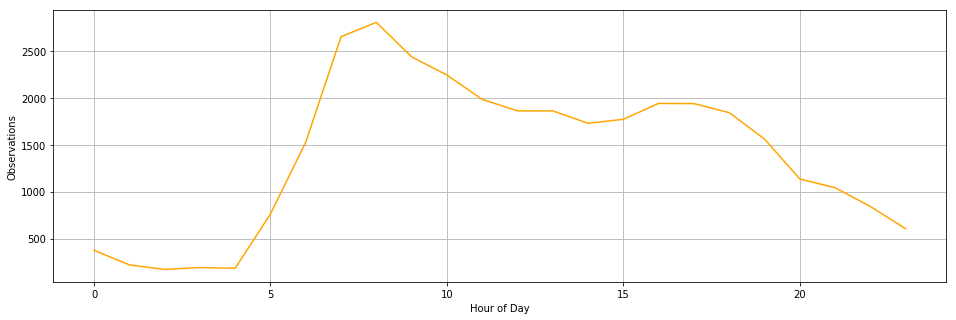

DT-0039. Richmond-WB_Jarvis-to-Yonge


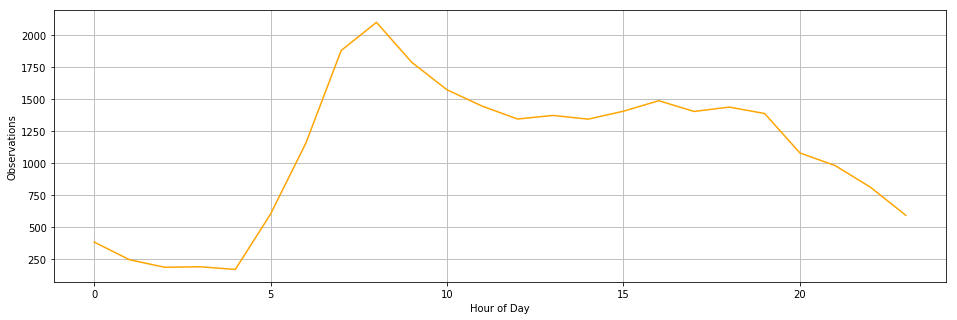

DT-0040. Richmond-WB_Yonge-to-University


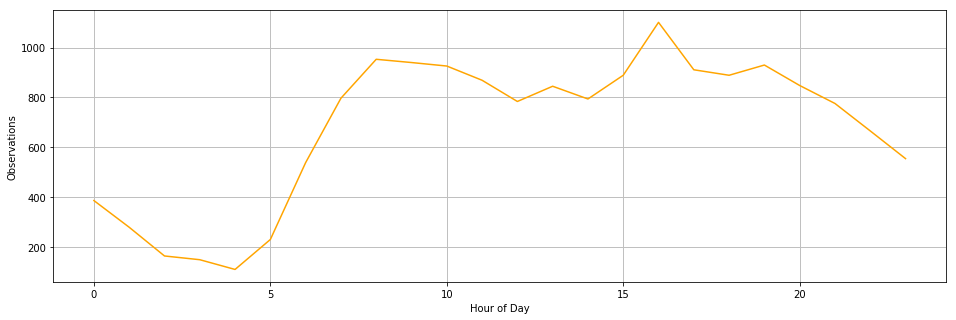

DT-0041. Richmond-WB_University-to-Spadina


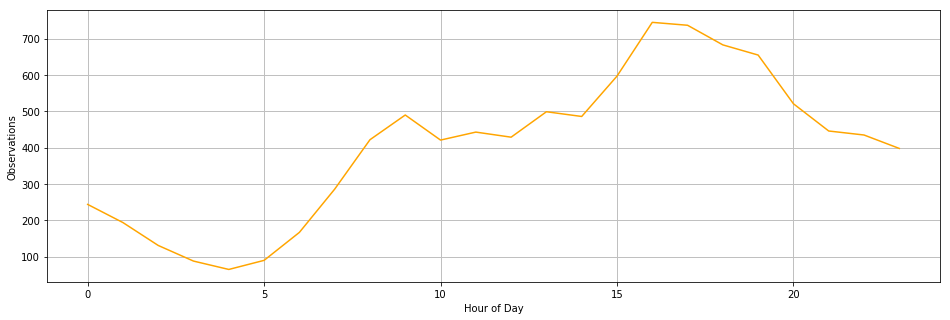

DT-0042. Richmond-WB_Spadina-to-Bathurst


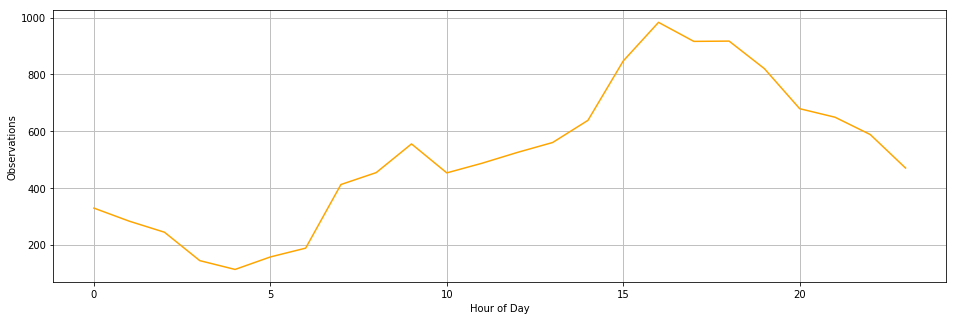

DT-0044. Adelaide-EB_Spadina-to-University


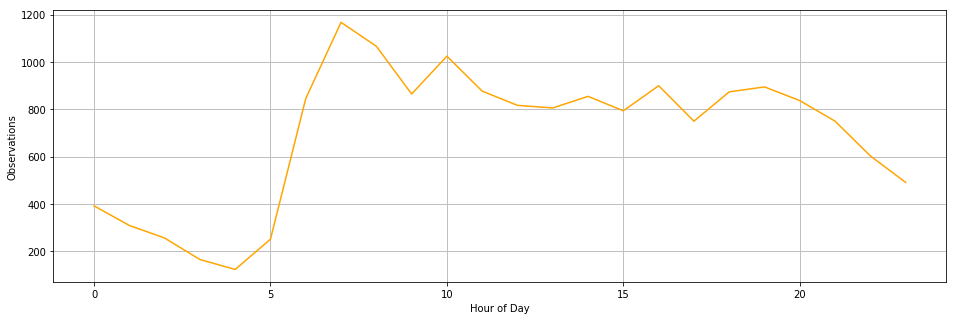

DT-0045. Adelaide-EB_University-to-Yonge


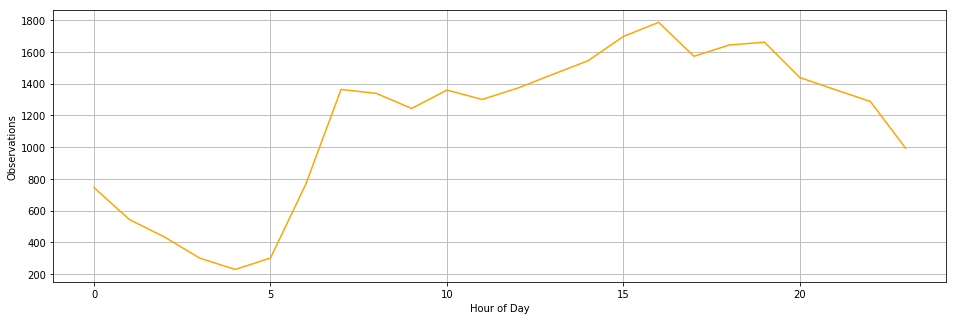

DT-0046. Adelaide-EB_Yonge-to-Jarvis


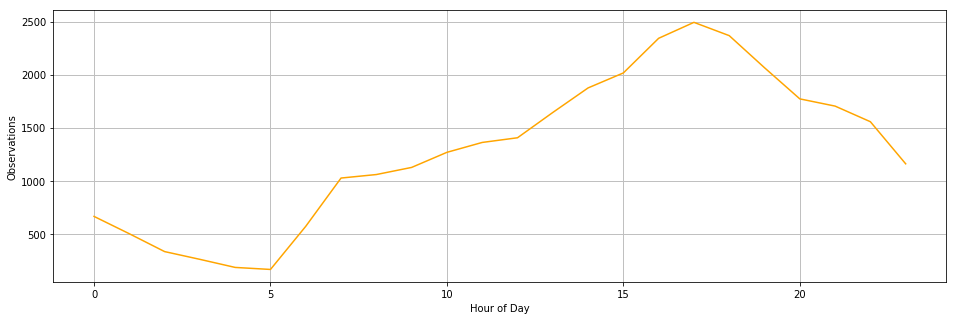

DT-0047. Adelaide-EB_Jarvis-to-Parliament


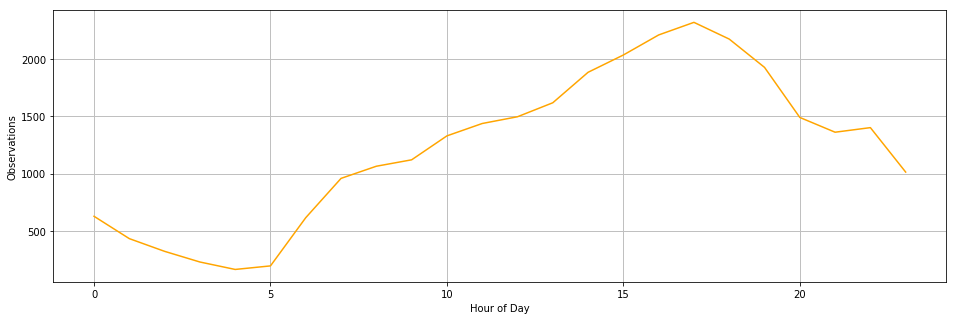

DT-0048. Adelaide/Eastern-EB_Parliament-to-Broadview


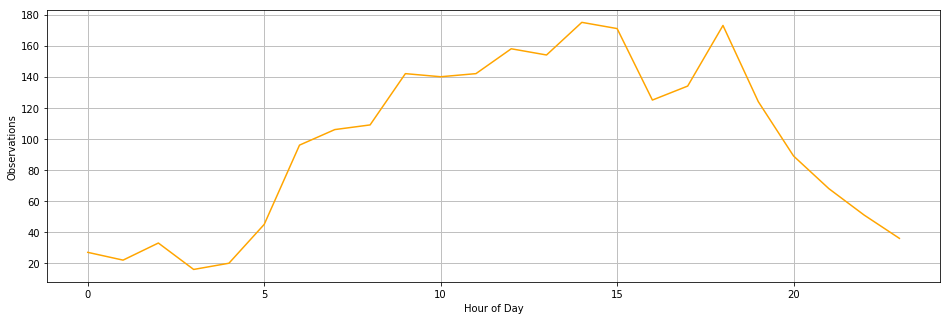

DT-0049. King-EB_Roncesvalles-to-Dufferin


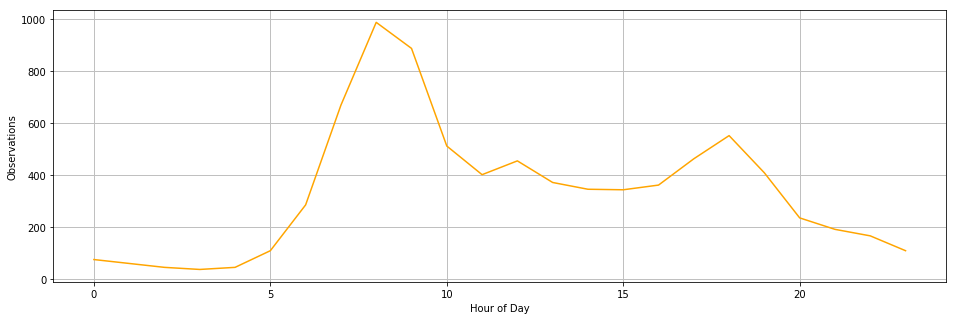

DT-0050. King-EB_Dufferin-to-Strachan


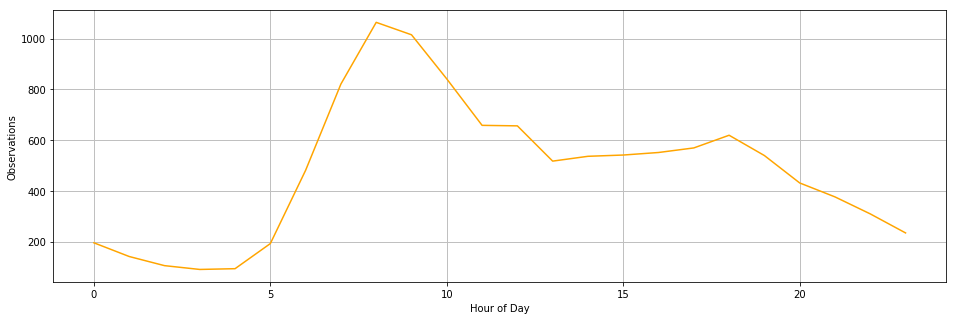

DT-0051. King-EB_Strachan-to-Bathurst


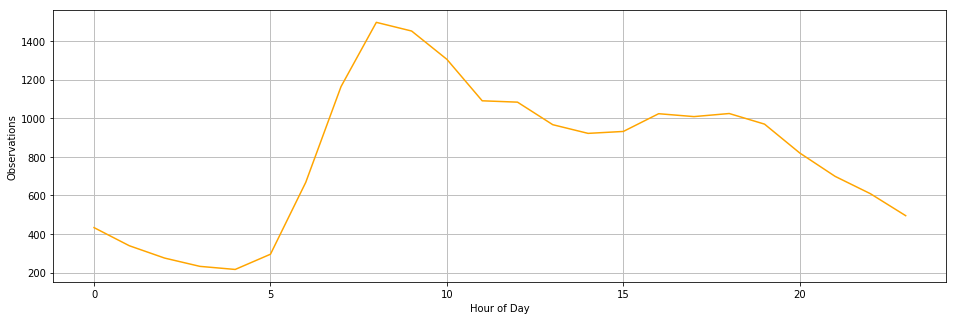

DT-0052. King-EB_Bathurst-to-Spadina


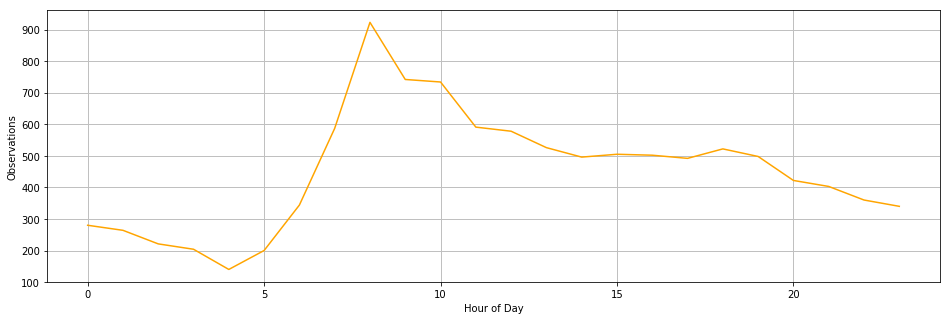

DT-0053. King-EB_Spadina-to-University


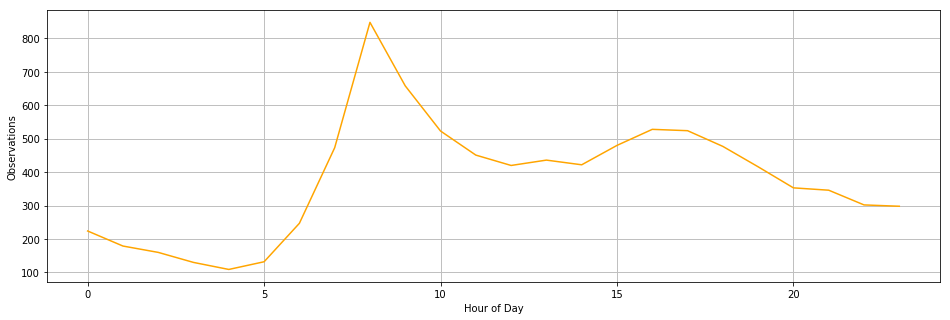

DT-0054. King-EB_University-to-Yonge


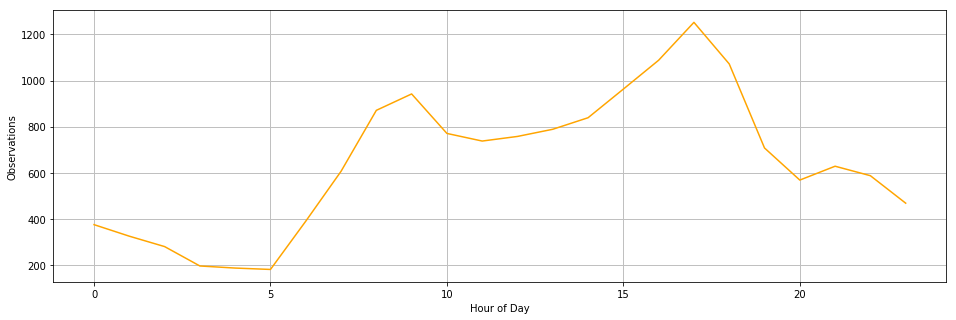

DT-0055. King-EB_Yonge-to-Jarvis


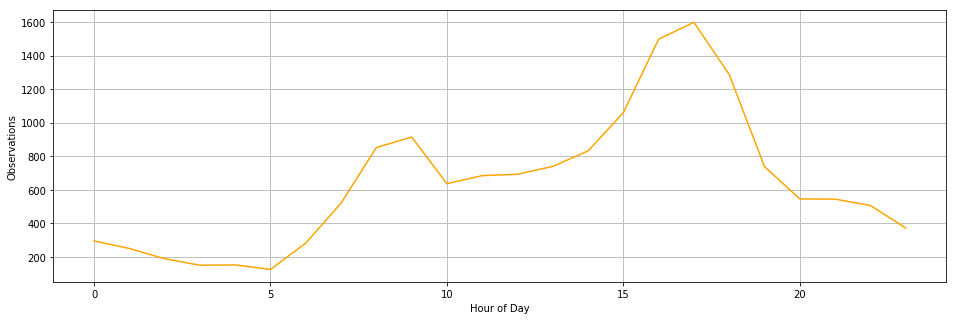

DT-0056. King-EB_Jarvis-to-Parliament


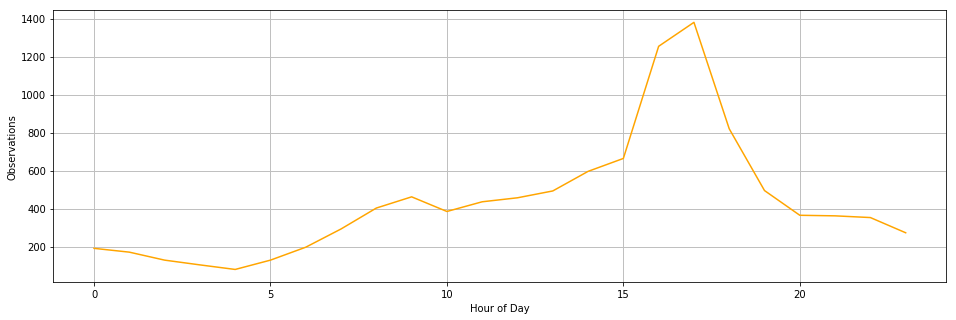

DT-0057. King-EB_Parliament-to-Broadview


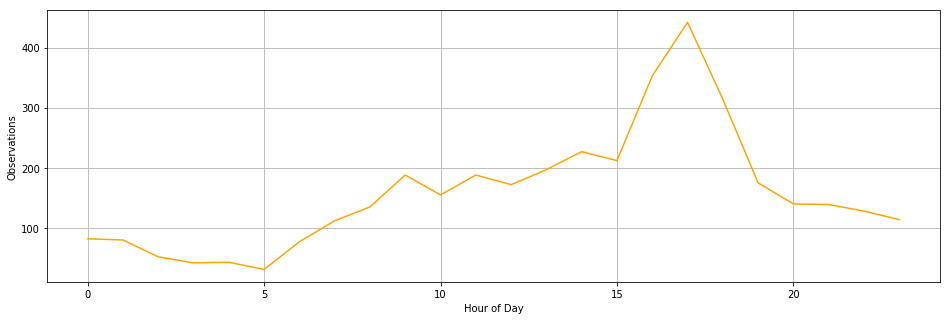

DT-0058. King-WB_Broadview-to-Parliament


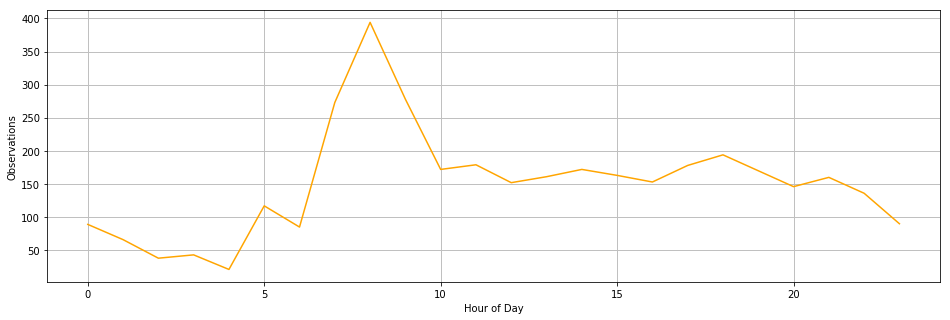

DT-0059. King-WB_Parliament-to-Jarvis


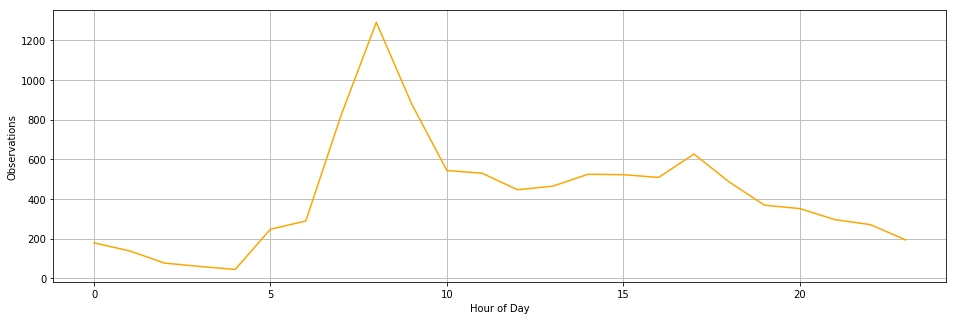

DT-0060. King-WB_Jarvis-to-Yonge


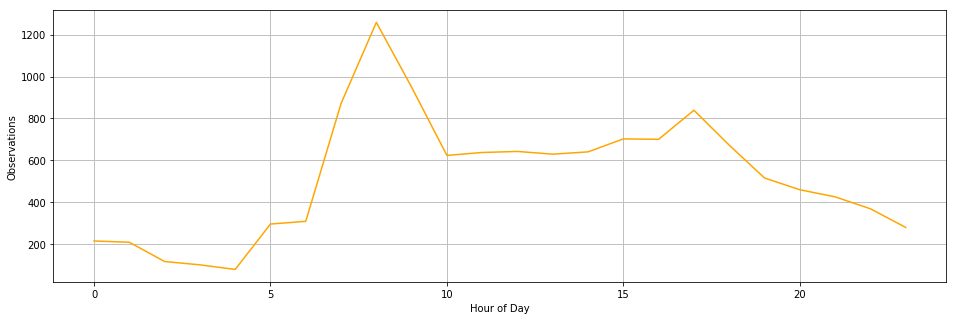

DT-0061. King-WB_Yonge-to-University


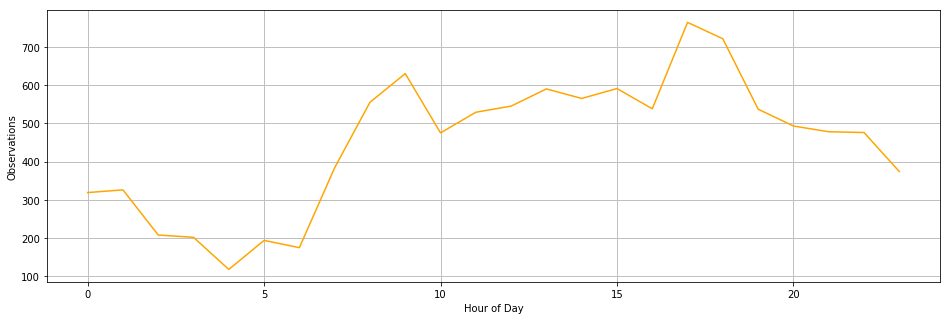

DT-0062. King-WB_University-to-Spadina


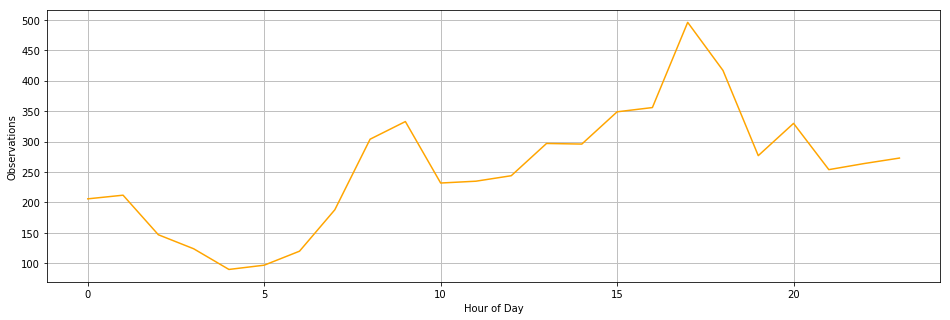

DT-0063. King-WB_Spadina-to-Bathurst


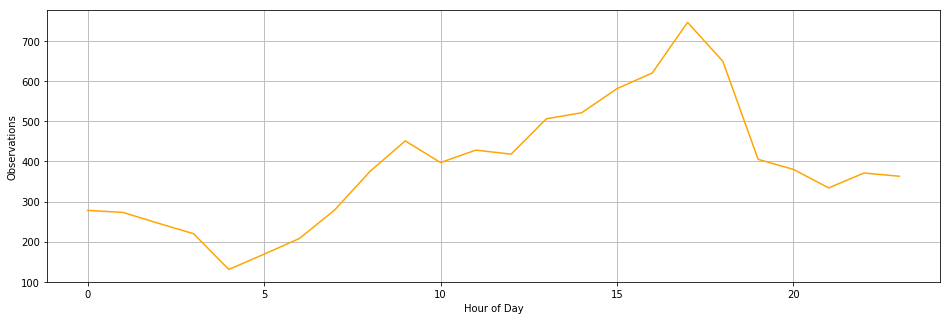

DT-0064. King-WB_Bathurst-to-Strachan


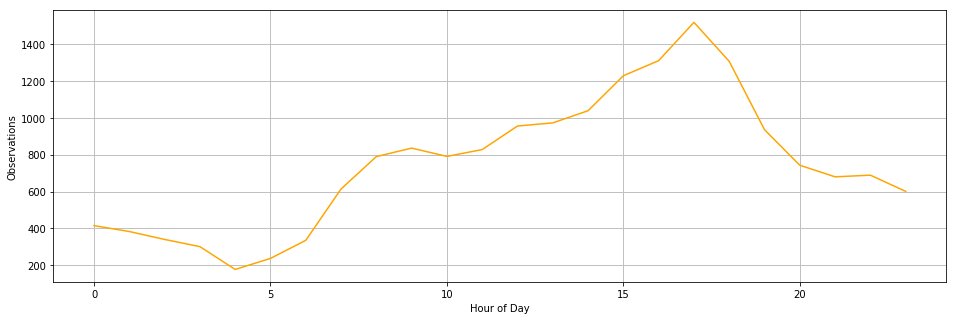

DT-0065. King-WB_Strachan-to-Dufferin


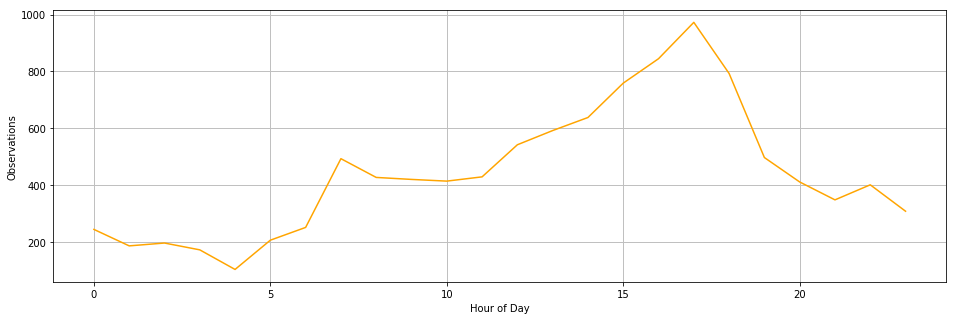

DT-0066. King-WB_Dufferin-to-Roncesvalles


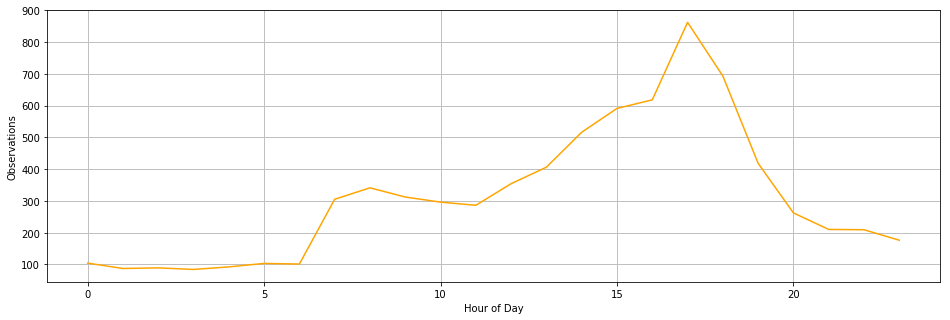

DT-0067. Front/Wellington-WB_Jarvis-to-Yonge


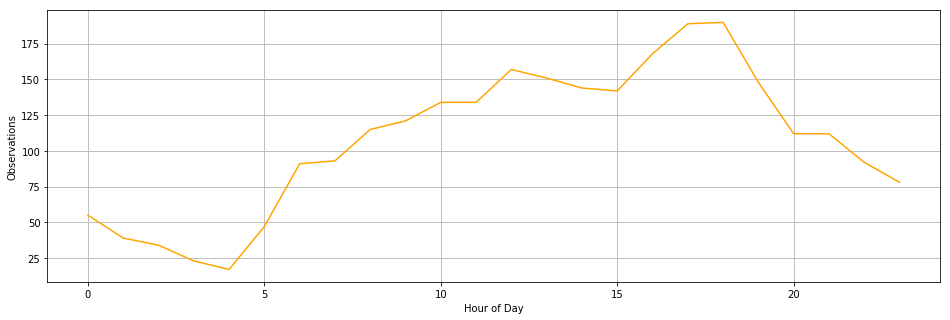

DT-0068. Wellington-WB_Yonge-to-University


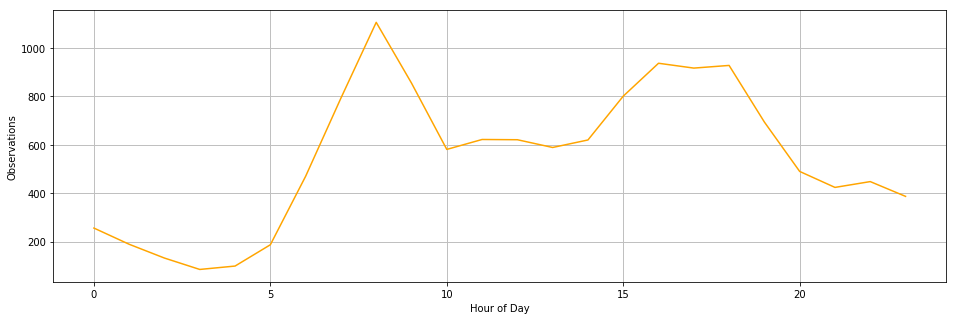

DT-0069. Wellington-WB_University-to-BlueJays


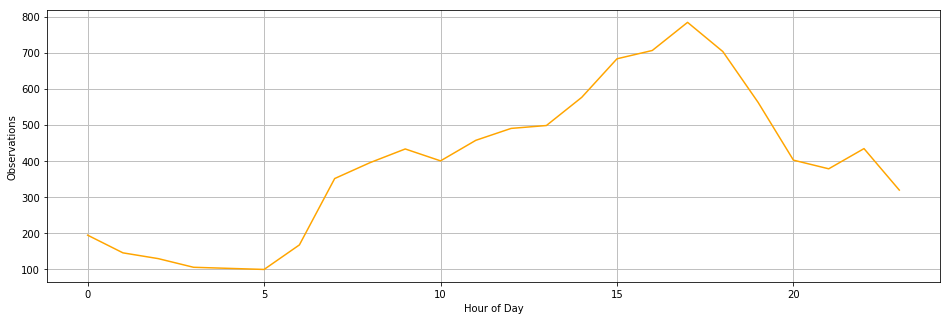

DT-0070. Front-EB_Bathurst-to-Spadina


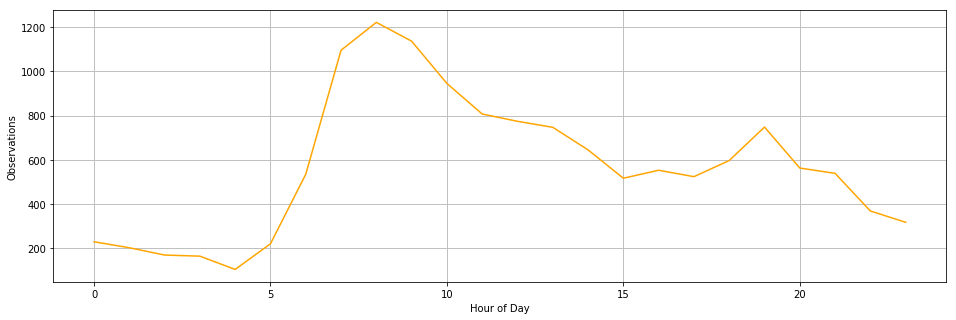

DT-0071. Front-EB_Spadina-to-University


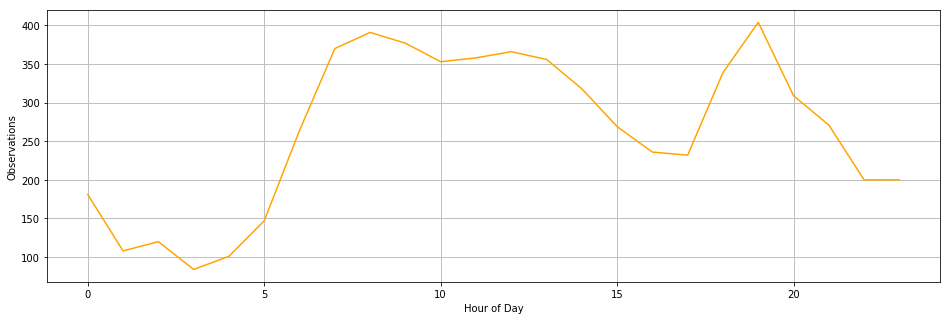

DT-0072. Front-EB_University-to-Yonge


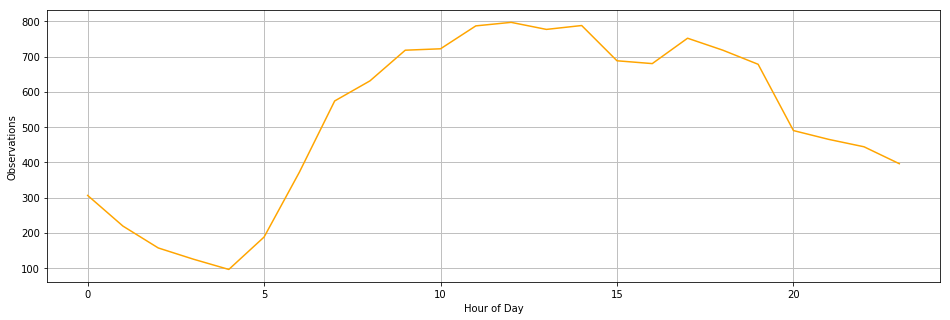

DT-0073. Front-EB_Yonge-to-Jarvis


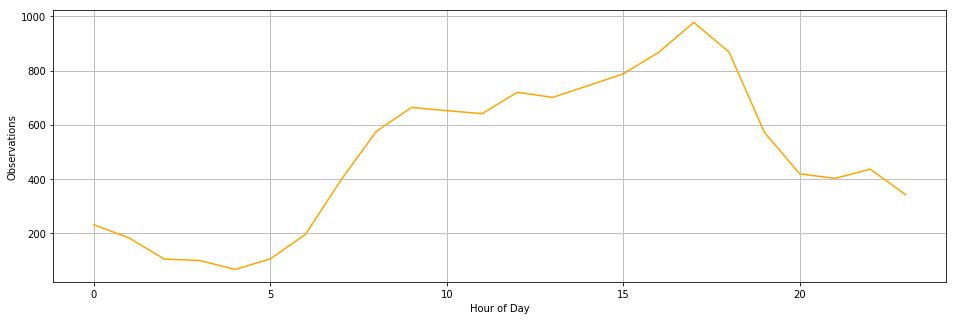

DT-0074. Front-EB_Jarvis-to-Parliament


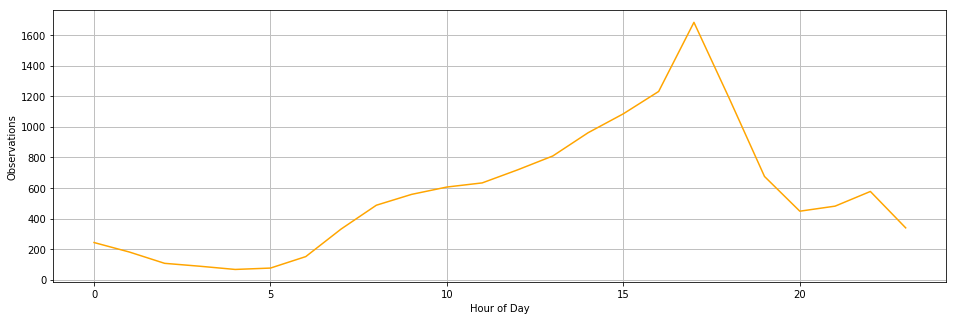

DT-0075. Front-WB_Parliament-to-Jarvis


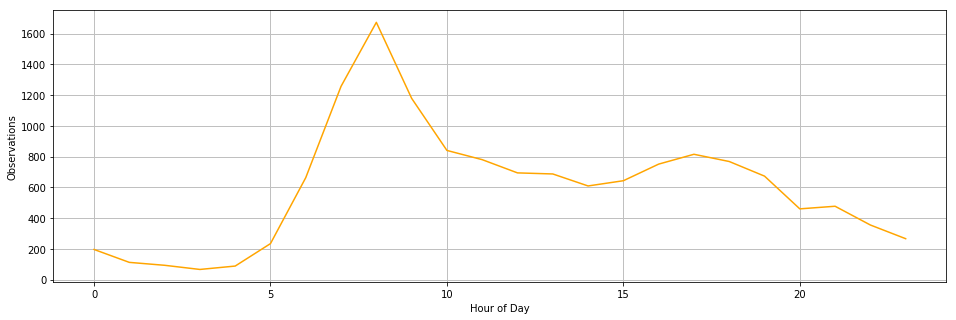

DT-0076. Front-WB_Yonge-to-University


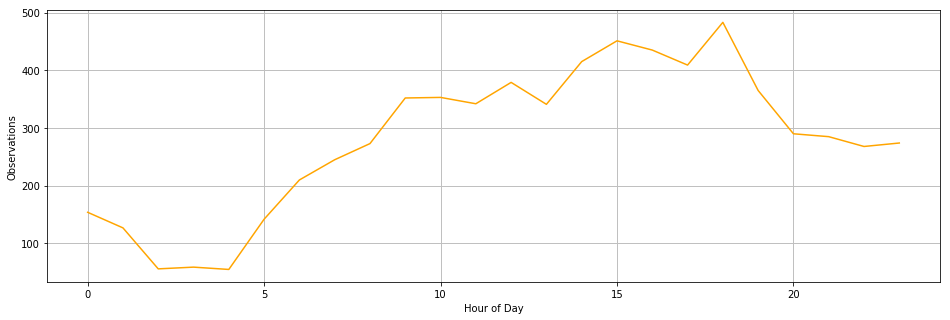

DT-0077. Front-WB_University-to-Spadina


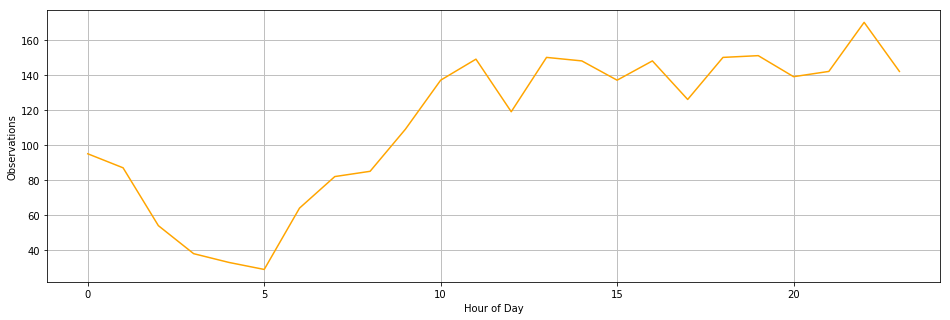

DT-0078. Front-WB_Spadina-to-Bathurst


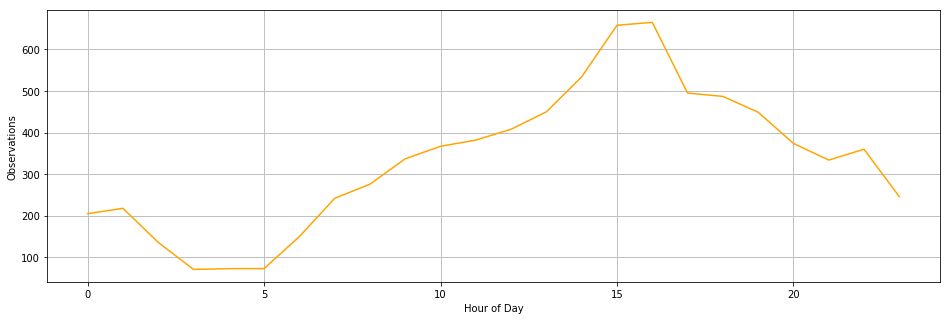

DT-0079. FortYork/Bremner-EB_Bathurst-to-Spadina


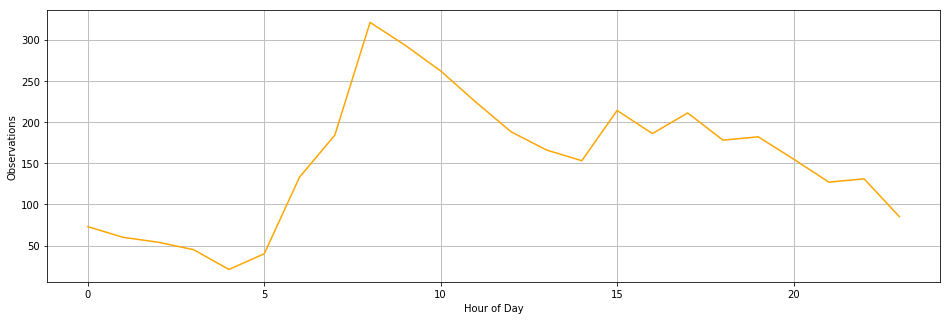

DT-0080. FortYork/Bremner-EB_Spadina-to-York


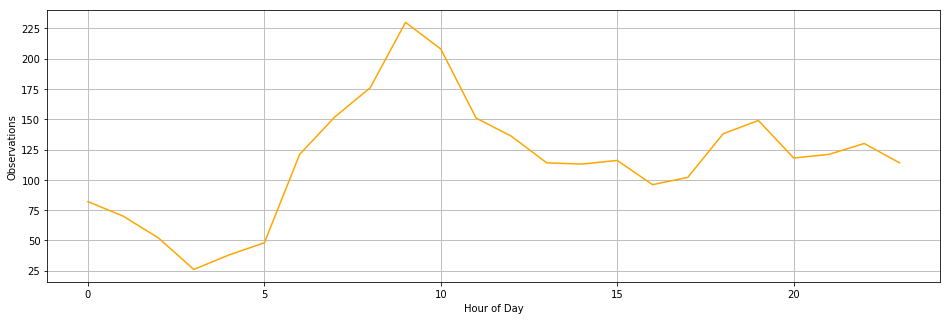

DT-0081. FortYork/Bremner-WB_York-to-Spadina


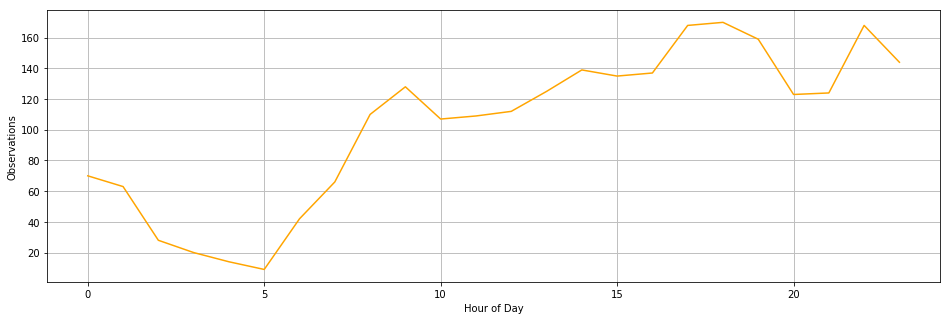

DT-0082. FortYork/Bremner-WB_Spadina-to-Bathurst


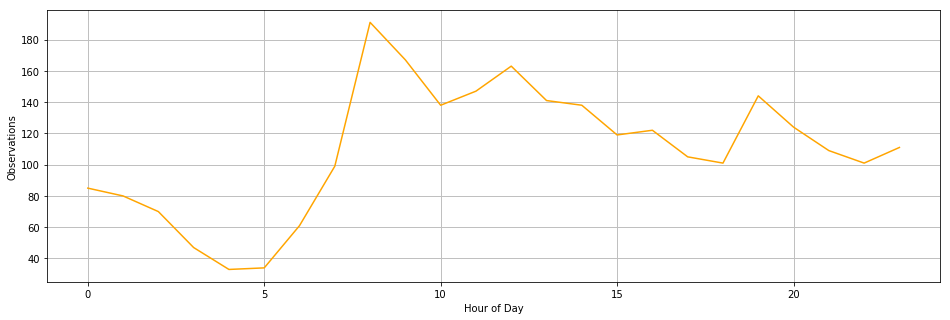

DT-0083. Roncesvalles-SB_Dundas-to-Queen


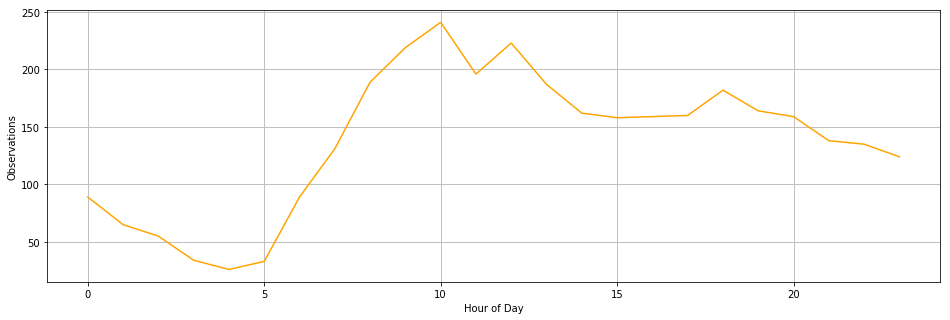

DT-0084. Roncesvalles-NB_Queen-to-Dundas


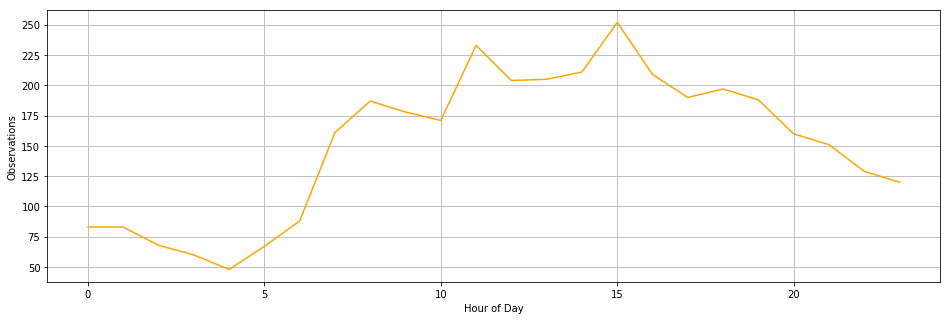

DT-0085. Dufferin-SB_Dundas-to-Queen


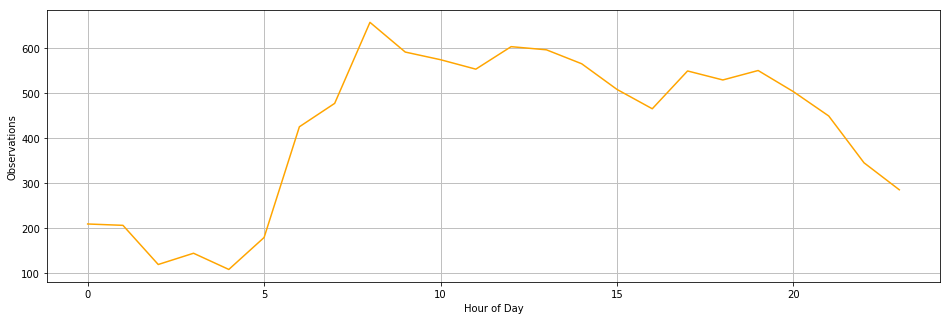

DT-0086. Dufferin-SB_Queen-to-King


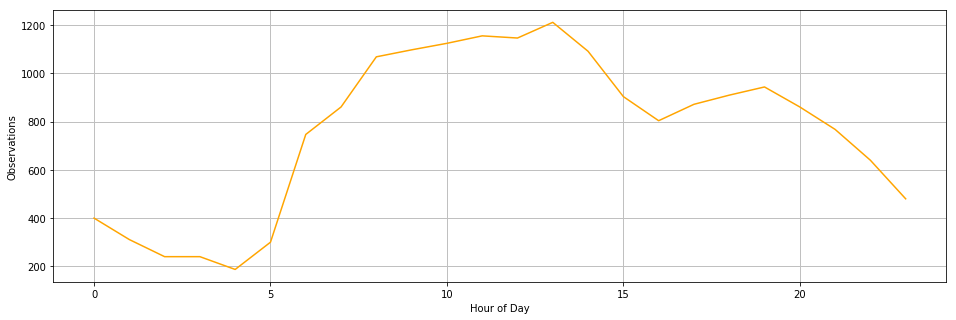

DT-0087. Dufferin-NB_King-to-Queen


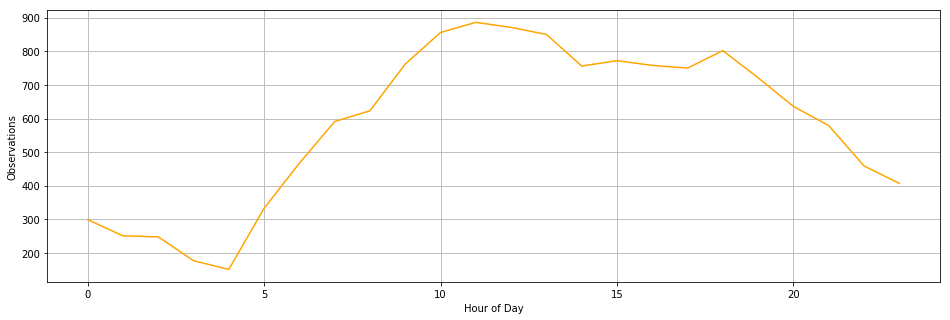

DT-0088. Dufferin-NB_Queen-to-Dundas


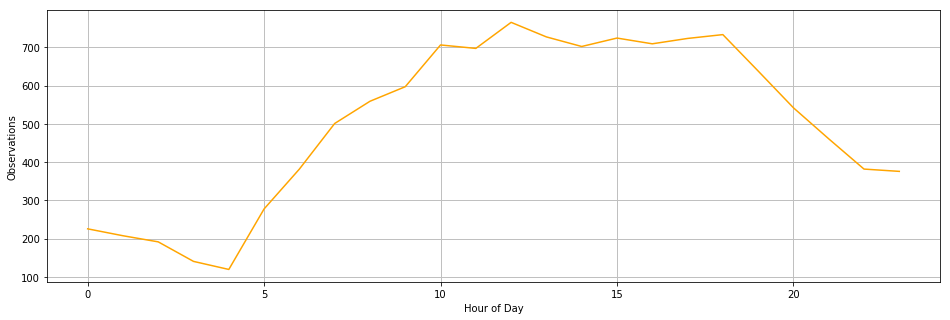

DT-0089. Strachan-SB_Queen-to-King


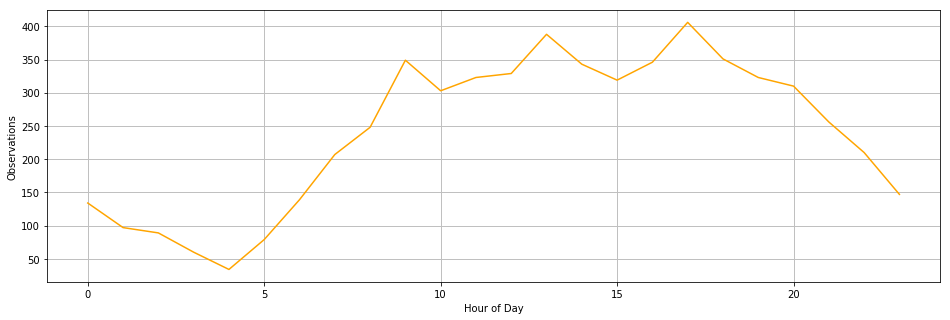

DT-0090. Strachan-NB_King-to-Queen


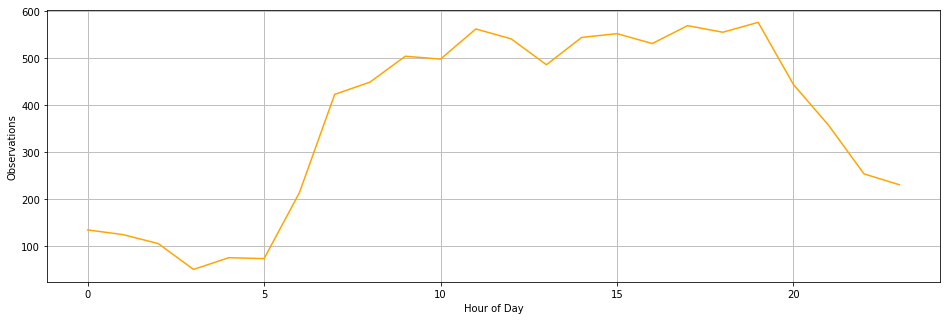

DT-0091. Bathurst-SB_College-to-Dundas


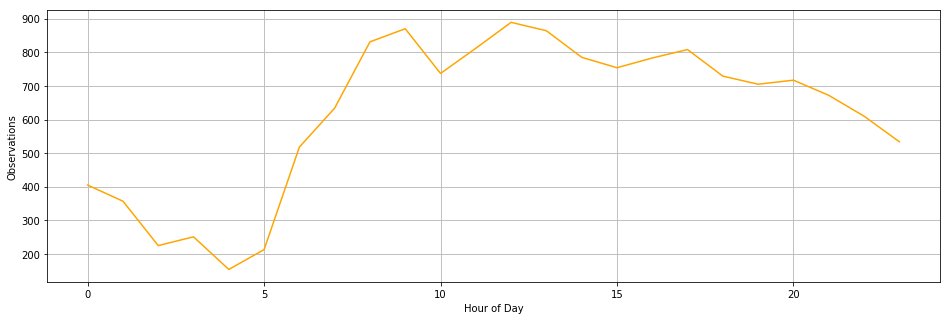

DT-0092. Bathurst-SB_Dundas-to-Queen


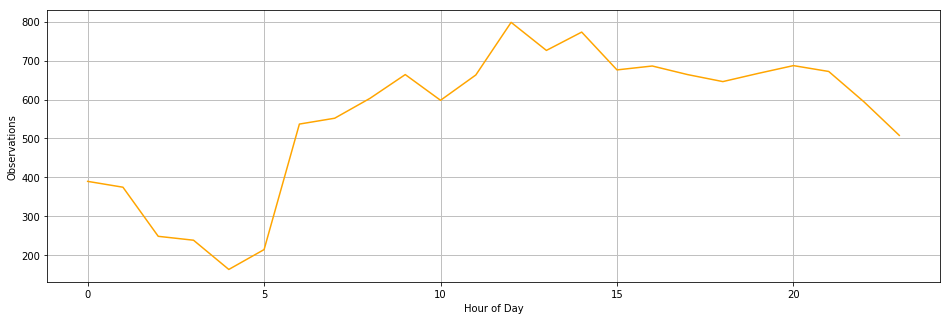

DT-0093. Bathurst-SB_Queen-to-King


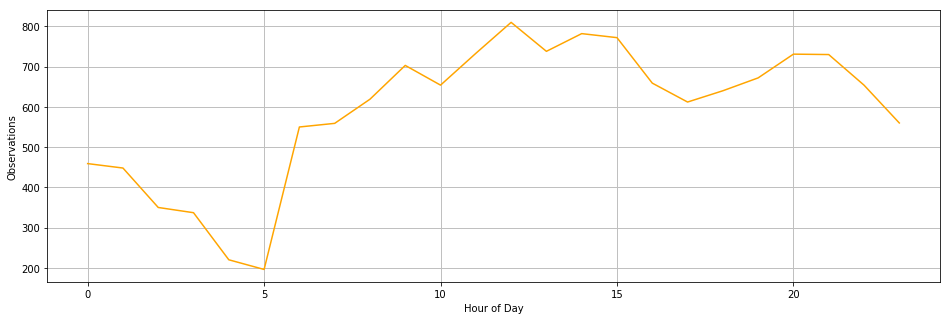

DT-0094. Bathurst-SB_King-to-Front


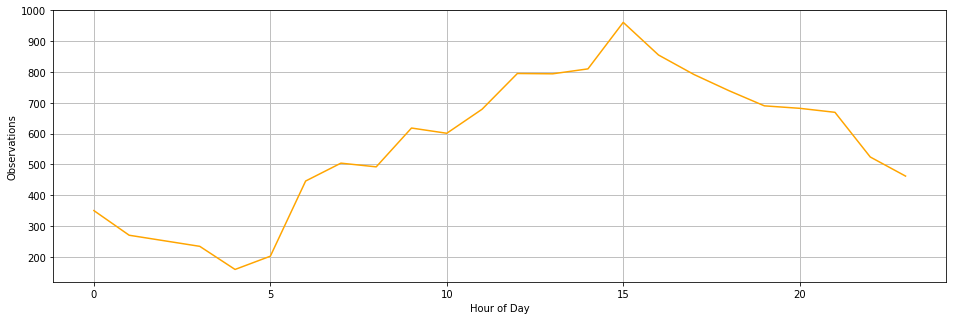

DT-0095. Bathurst-SB_Front-to-FortYork


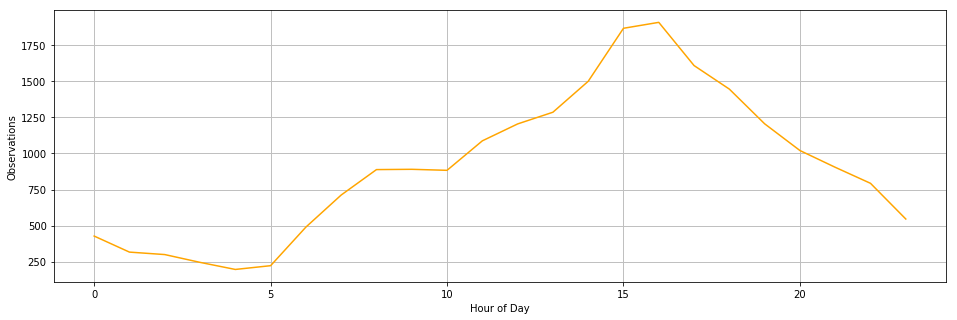

DT-0096. Bathurst-NB_FortYork-to-Front


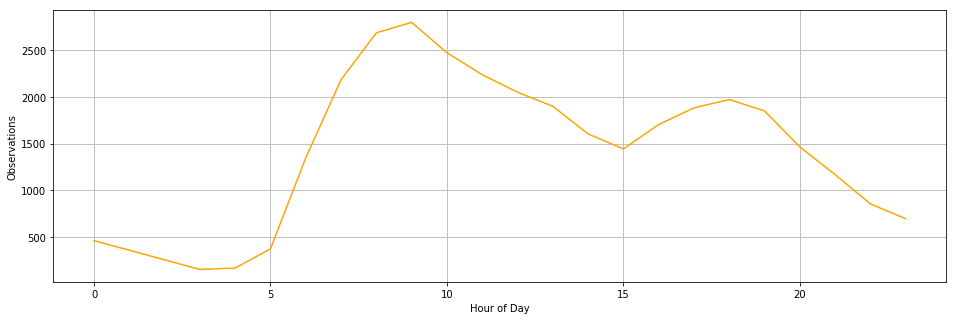

DT-0097. Bathurst-NB_Front-to-King


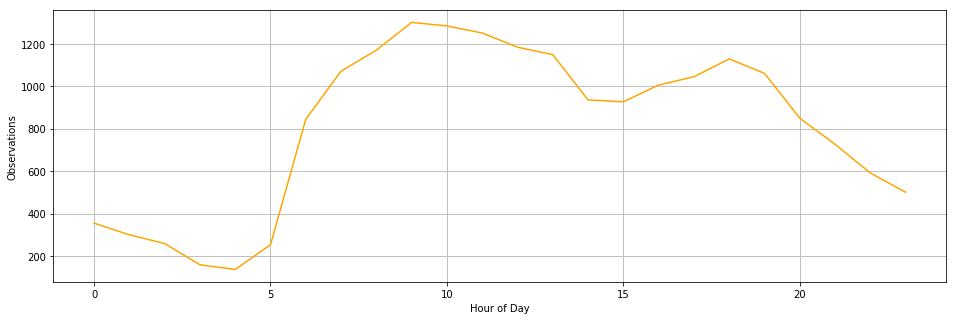

DT-0098. Bathurst-NB_King-to-Queen


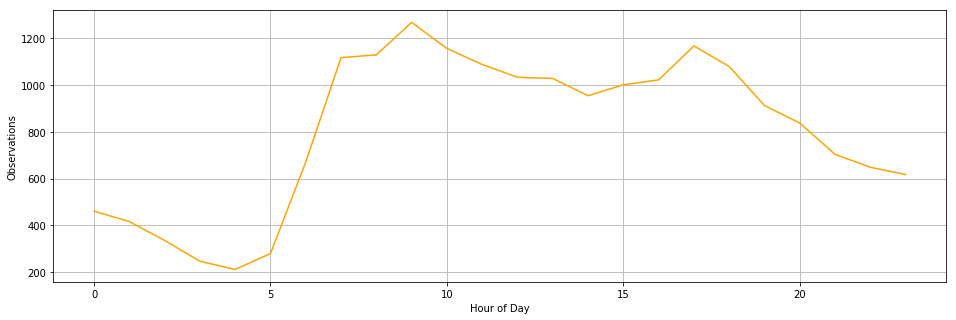

DT-0099. Bathurst-NB_Queen-to-Dundas


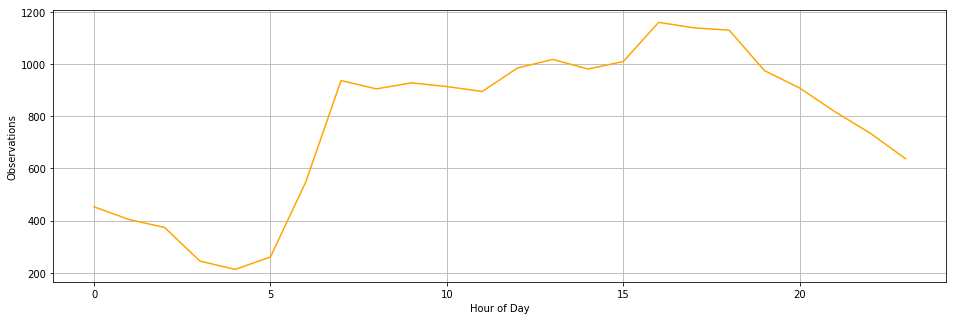

DT-0100. Bathurst-NB_Dundas-to-College


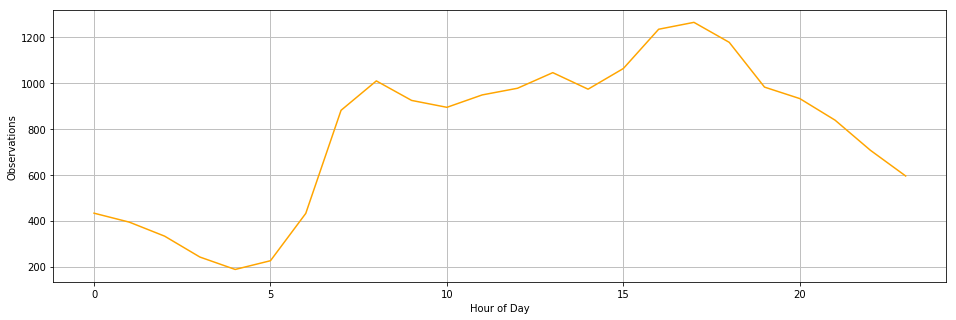

DT-0101. Spadina-SB_Dundas-to-Queen


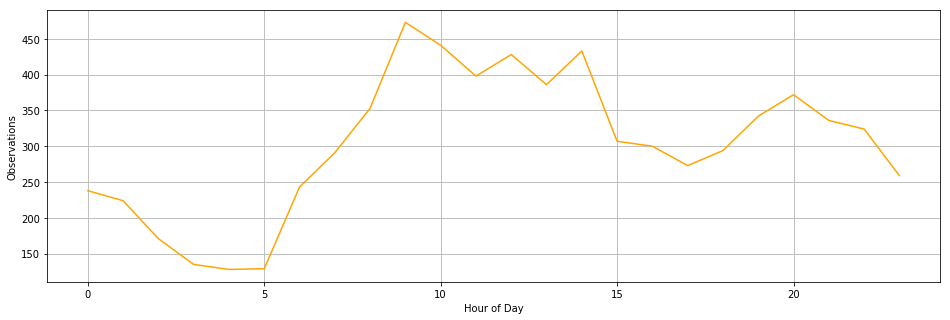

DT-0102. Spadina-SB_Queen-to-King


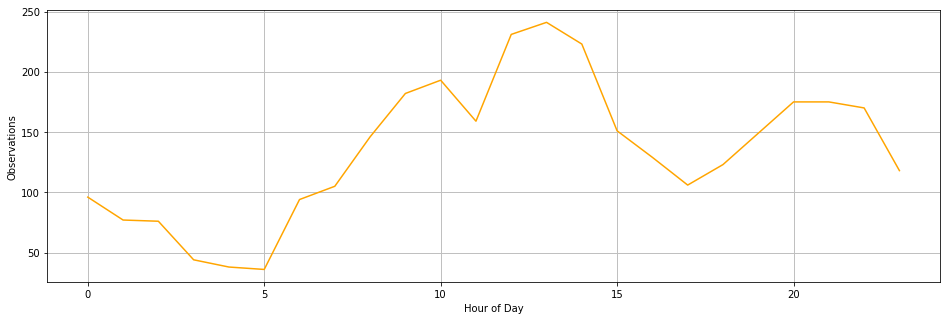

DT-0103. Spadina-SB_King-to-Front


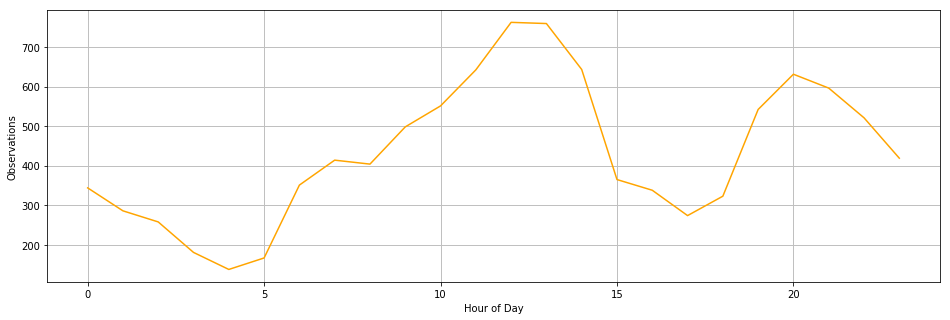

DT-0104. Spadina-SB_Front-to-Bremner


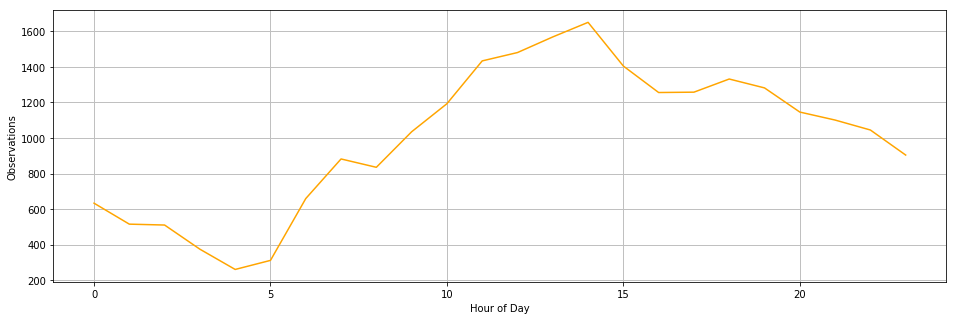

DT-0105. Spadina-NB_Bremner-to-Front


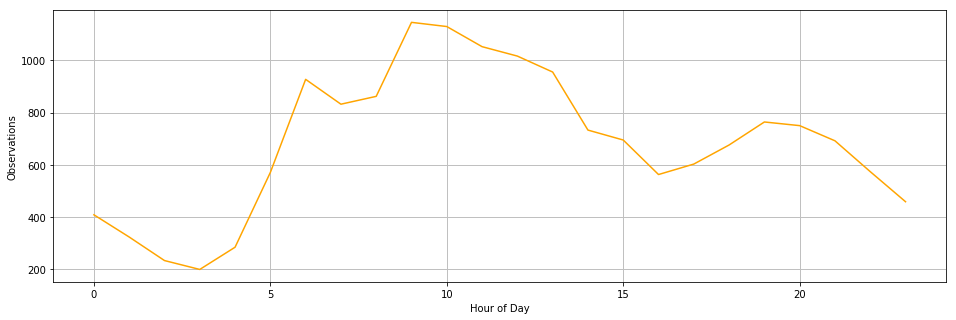

DT-0106. Spadina-NB_Front-to-King


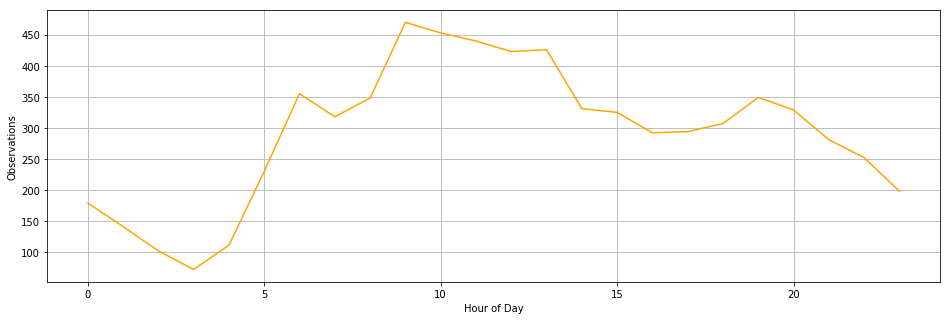

DT-0107. Spadina-NB_King-to-Queen


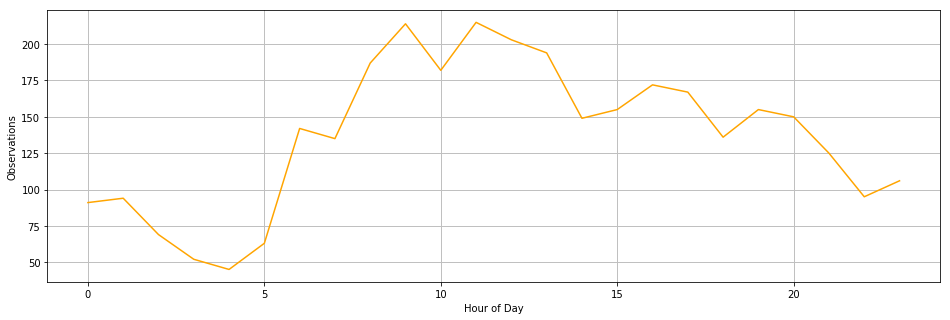

DT-0108. Spadina-NB_Queen-to-Dundas


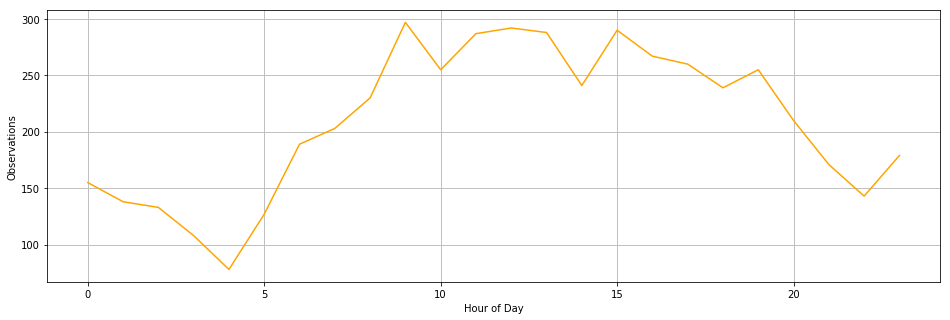

DT-0109. University-SB_College-to-Dundas


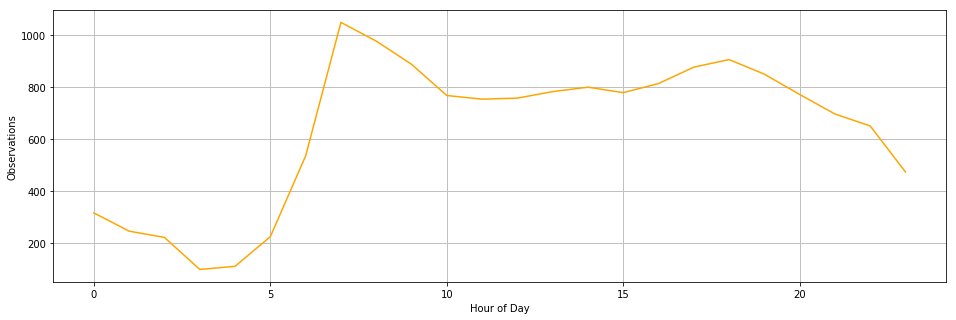

DT-0110. University-SB_Dundas-to-Queen


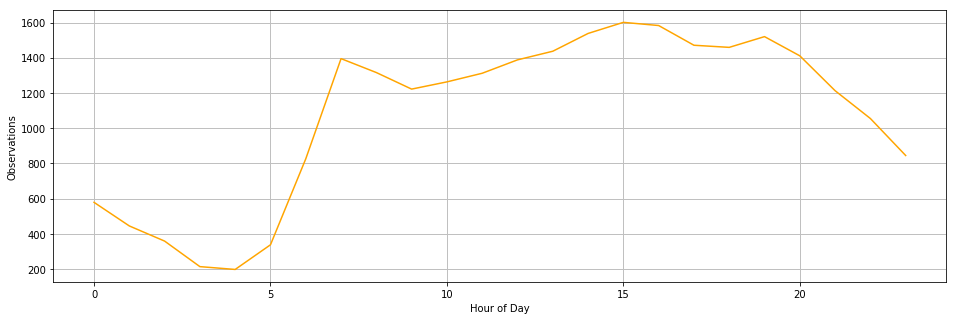

DT-0111. University-SB_Queen-to-King


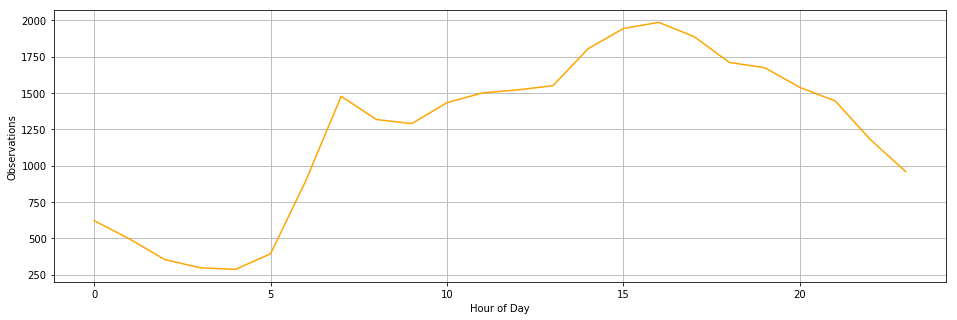

DT-0112. University-SB_King-to-Front


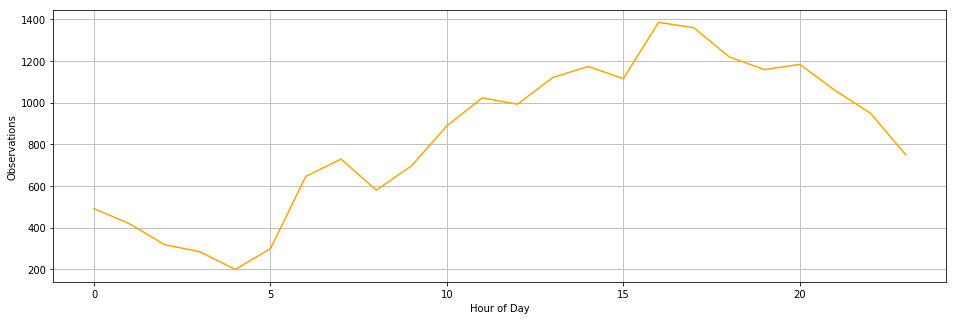

DT-0113. York-SB_Front-to-Bremner


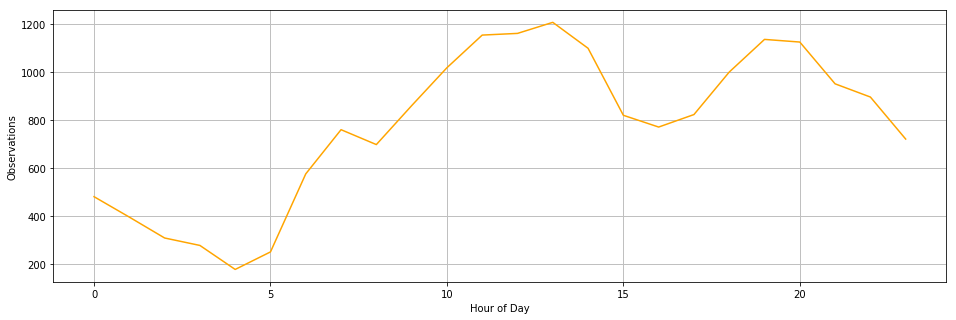

DT-0114. York-NB_Bremner-to-Front


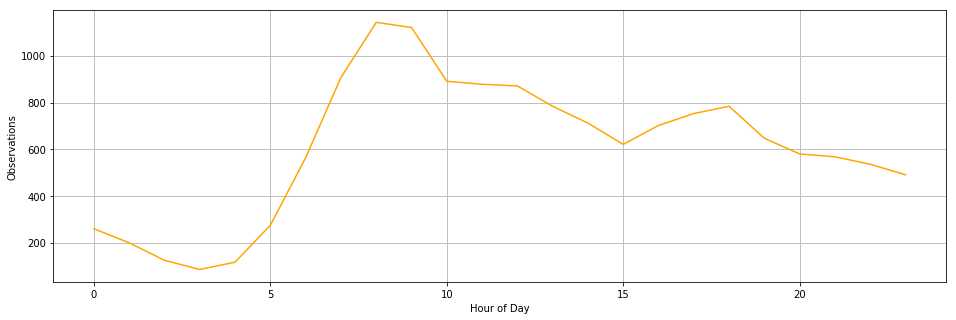

DT-0115. University-NB_Front-to-King


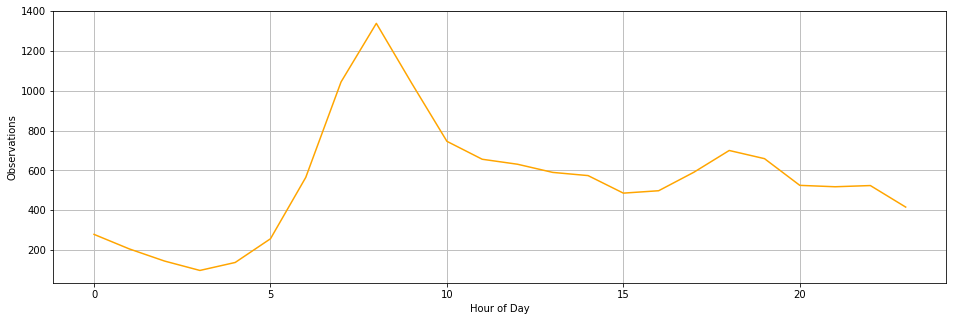

DT-0116. University-NB_King-to-Queen


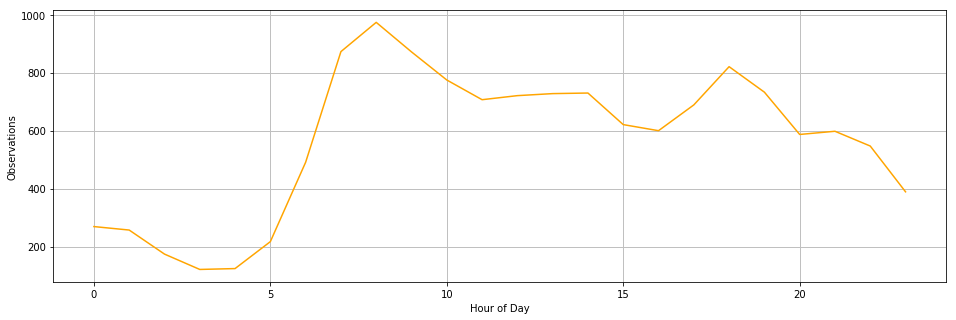

DT-0117. University-NB_Queen-to-Dundas


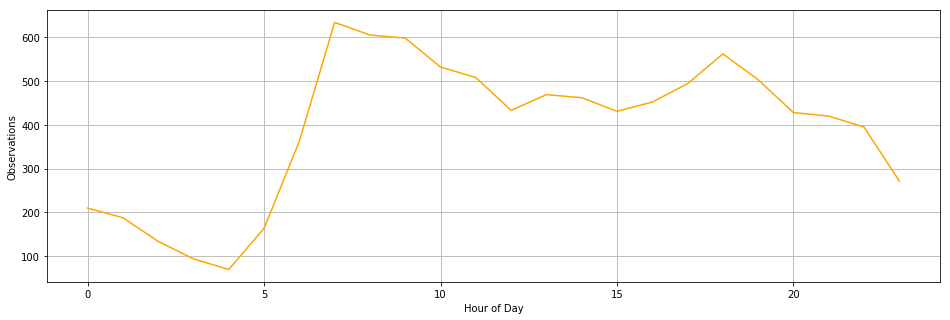

DT-0118. University-NB_Dundas-to-College


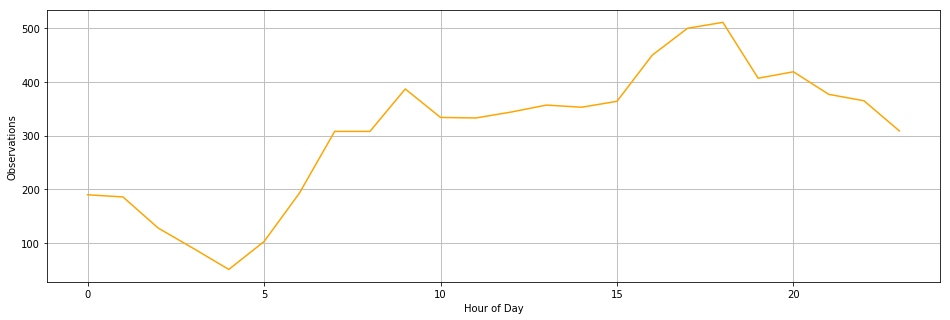

DT-0119. Yonge-SB_Dundas-to-Queen


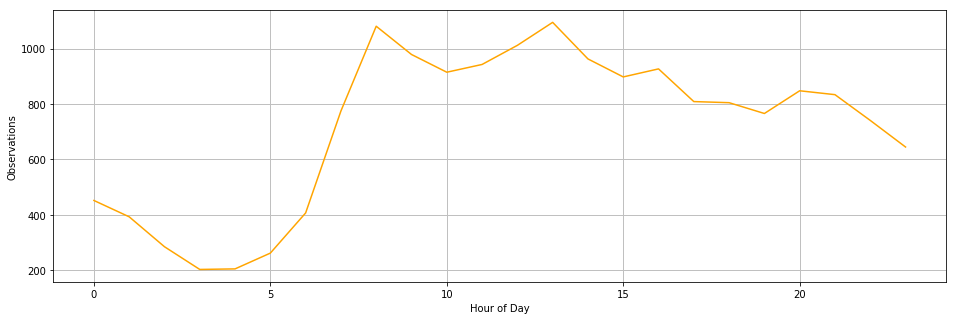

DT-0120. Yonge-SB_Queen-to-King


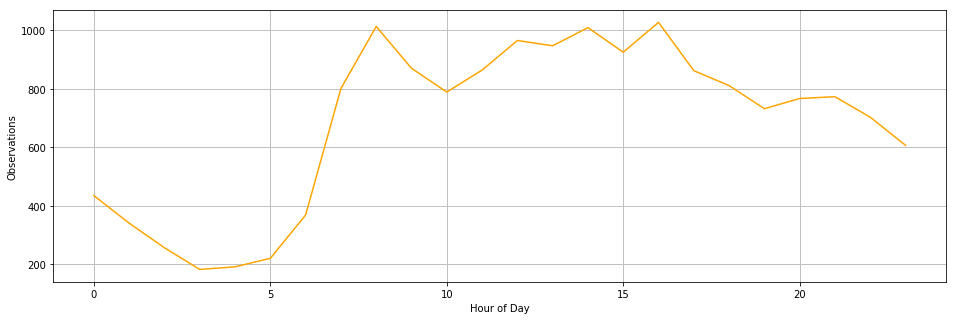

DT-0121. Yonge-SB_King-to-Front


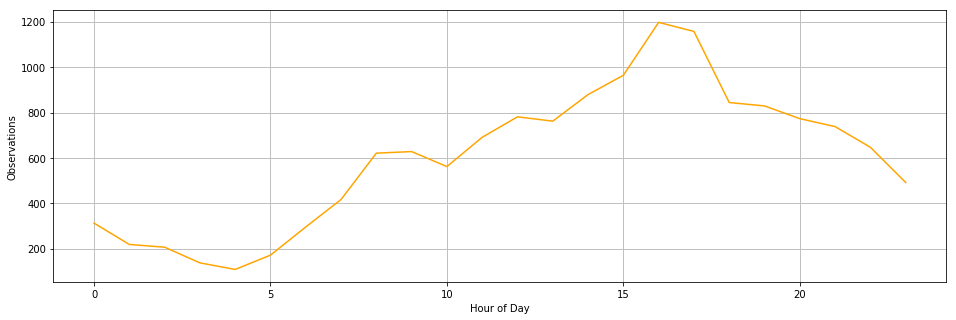

DT-0122. Yonge-NB_Front-to-King


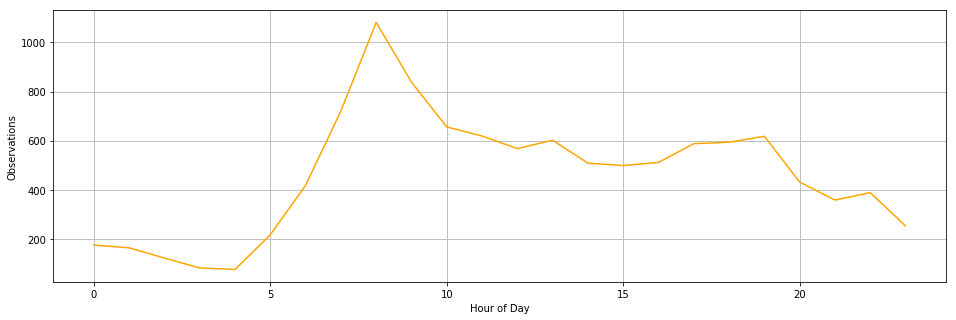

DT-0123. Yonge-NB_King-to-Queen


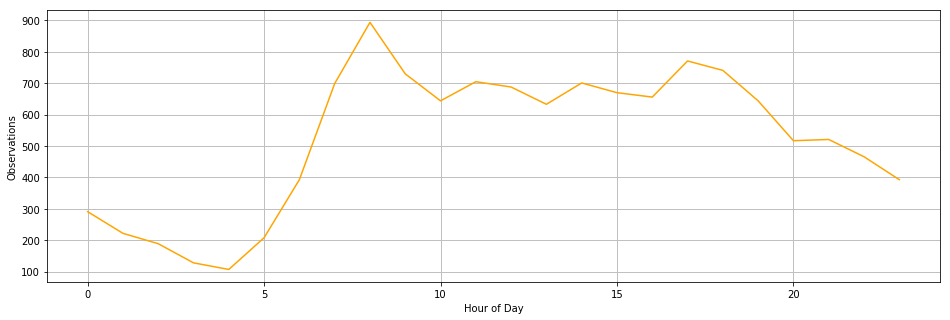

DT-0124. Yonge-NB_Queen-to-Dundas


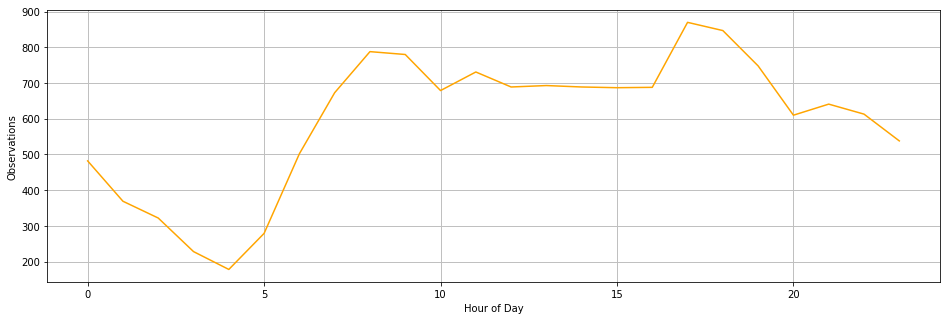

DT-0125. Jarvis-SB_Dundas-to-Queen


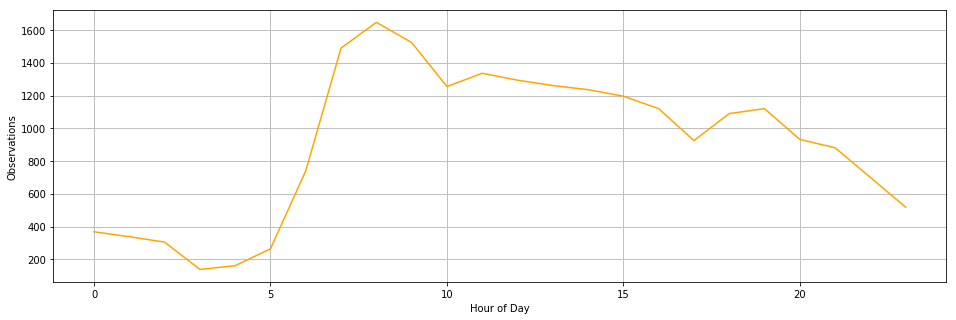

DT-0126. Jarvis-SB_Queen-to-King


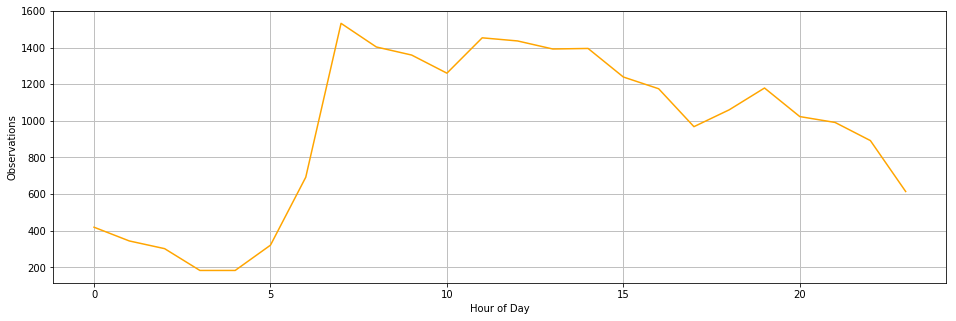

DT-0127. Jarvis-SB_King-to-Front


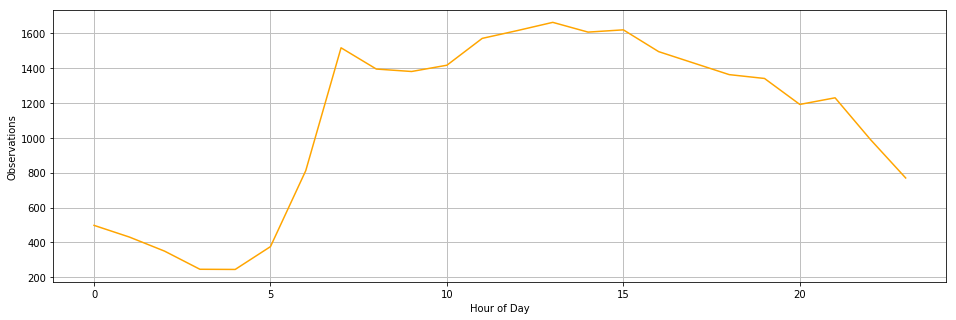

DT-0128. Jarvis-NB_Front-to-King


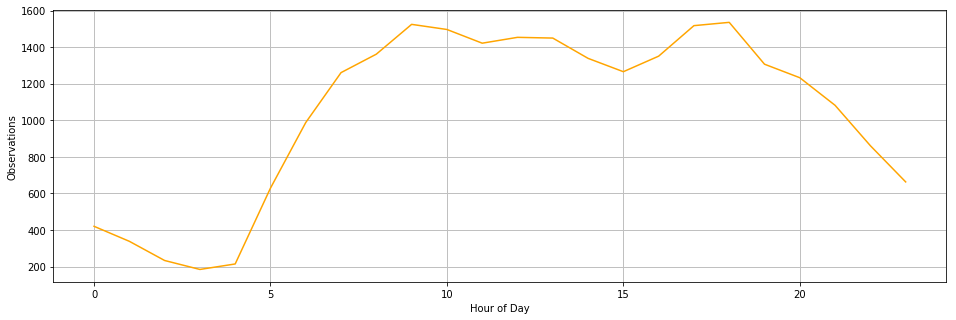

DT-0129. Jarvis-NB_King-to-Queen


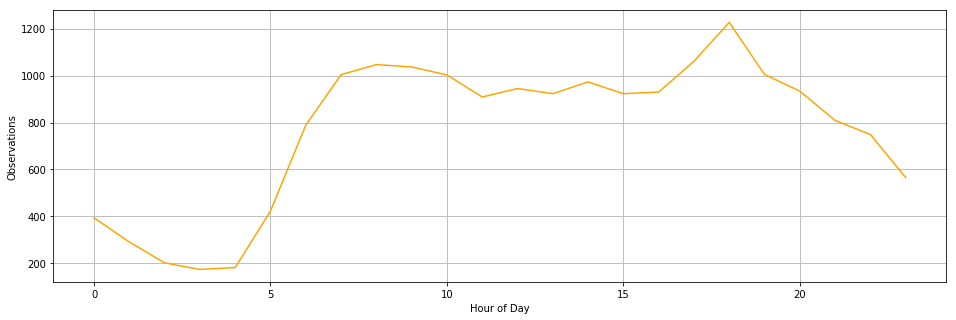

DT-0130. Jarvis-NB_Queen-to-Dundas


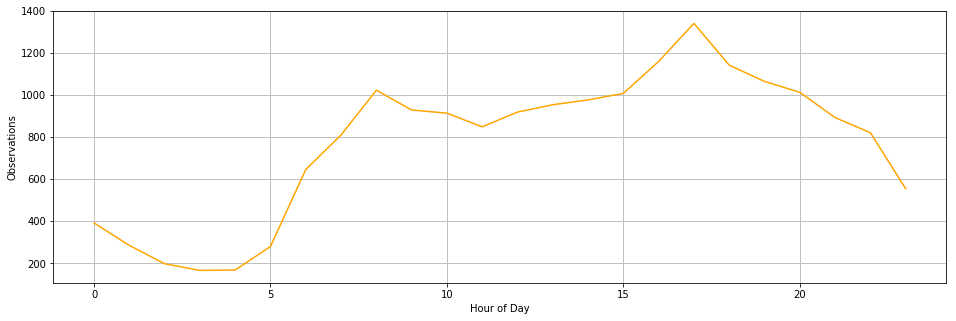

DT-0131. Parliament-SB_College-to-Dundas


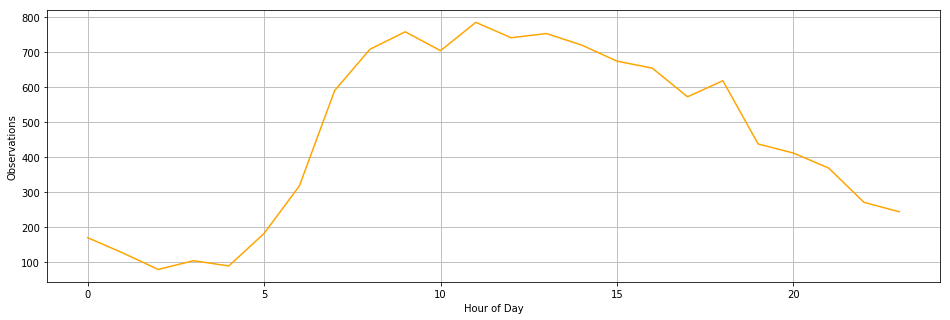

DT-0132. Parliament-SB_Dundas-to-Queen


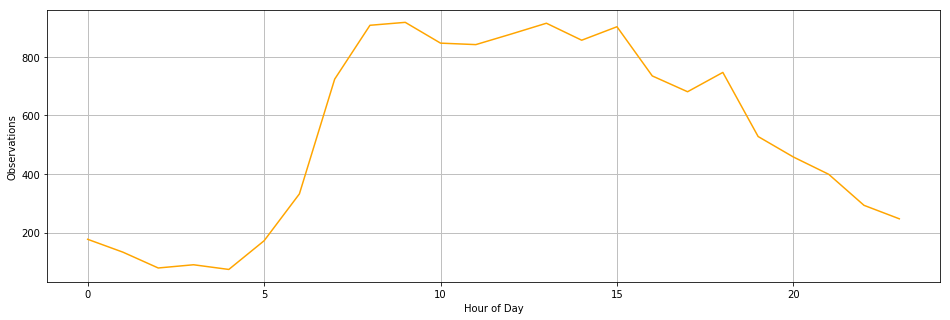

DT-0133. Parliament-SB_Queen-to-King


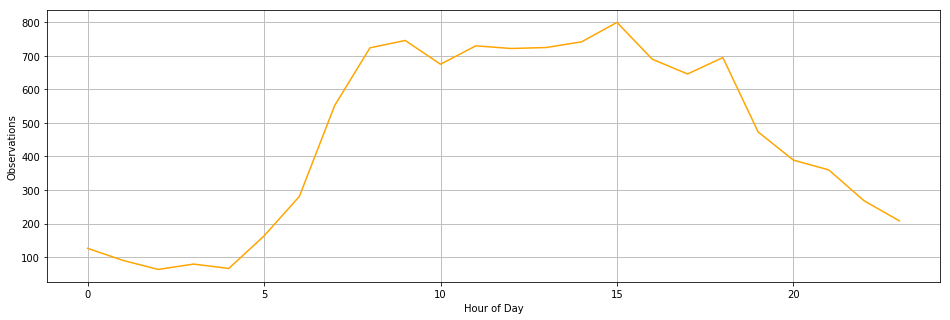

DT-0134. Parliament-SB_King-to-Front


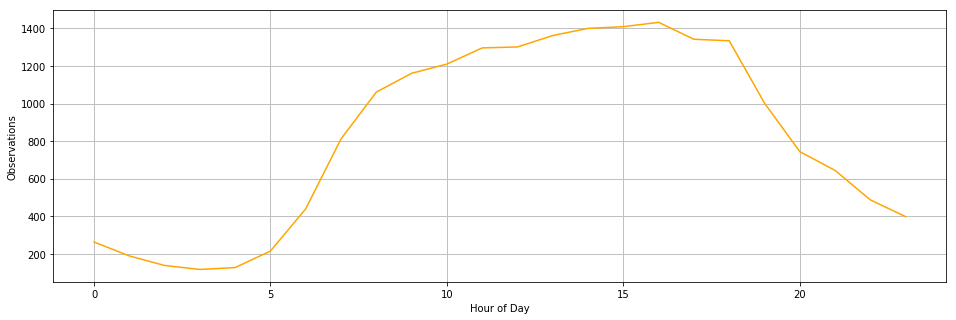

DT-0135. Parliament-NB_Front-to-King


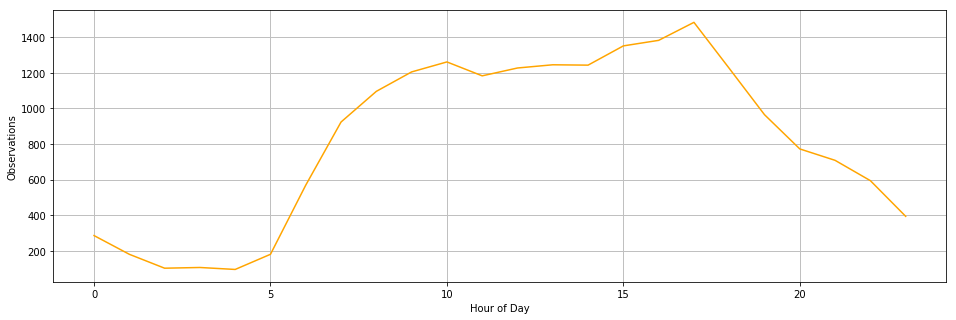

DT-0136. Parliament-NB_King-to-Queen


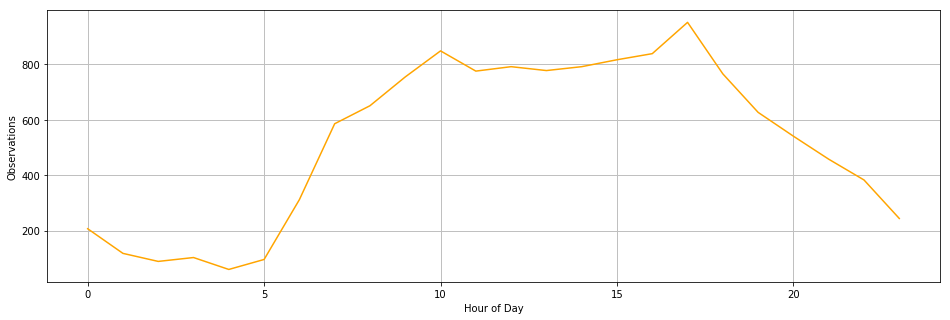

DT-0137. Parliament-NB_Queen-to-Dundas


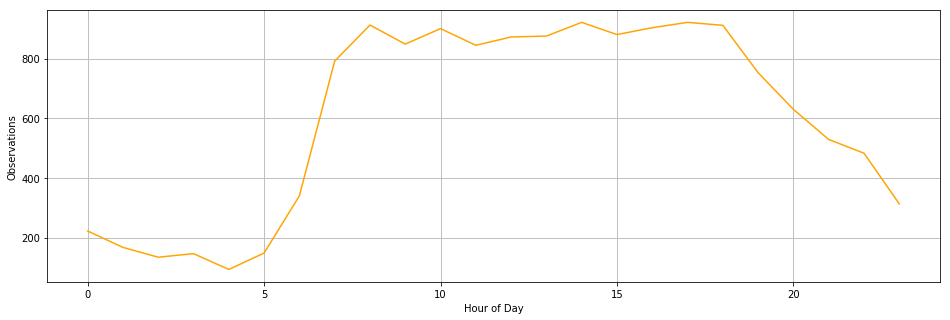

DT-0138. Parliament-NB_Dundas-to-College


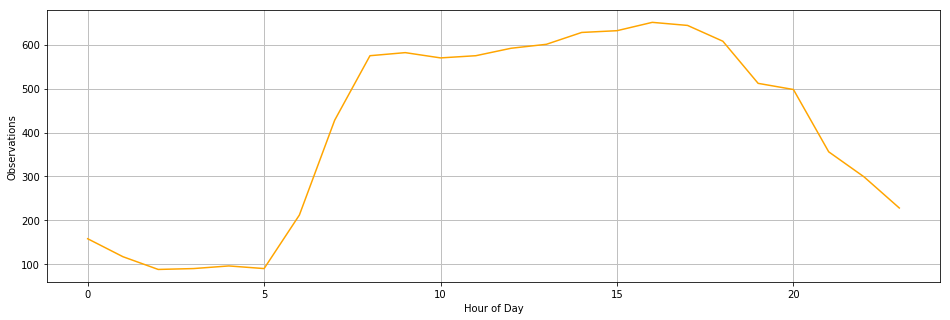

DT-0139. Broadview-SB_Queen-to-Eastern


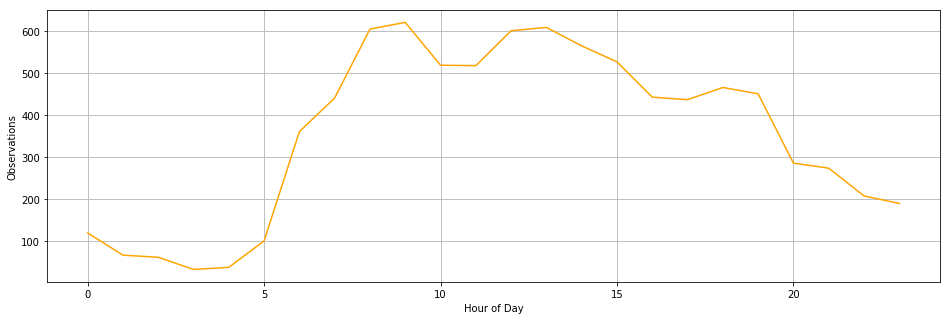

DT-0140. Broadview-NB_Eastern-to-Queen


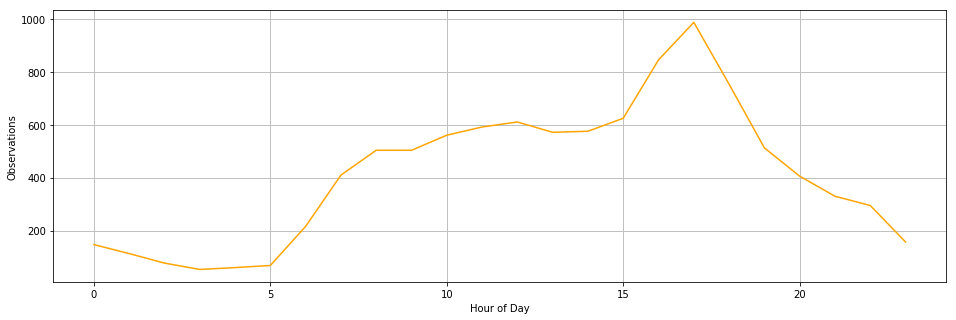

In [14]:
for i in range(n_routes):
    analysis_id = routes.analysis_id.values[i]
    report_name = routes.report_name.values[i]
    print(report_name)
    sql = pg.SQL('''SELECT sum(obs) obs_sum, trunc(EXTRACT(hour from datetime_bin)) AS "hour"
                      FROM aggr_30min
                      WHERE analysis_id = {analysis_id} AND weekday NOT IN (0,6)
                      GROUP BY trunc(EXTRACT(hour from datetime_bin))
                      ORDER BY trunc(EXTRACT(hour from datetime_bin));''').format(analysis_id = pg.Literal(str(analysis_id)))
    result = pandasql.read_sql(sql, con)
    fig, ax = plt.subplots(1, 1, figsize=(16,5))
    ax.grid(color='silver', linestyle='-', linewidth=1)
    obs_line = ax.plot(result.hour, result.obs_sum, color='orange')
    ax.set_ylabel('Observations')
    ax.set_xlabel('Hour of Day')
    plt.show()
    

Very few of the routes have a distinct AM and PM peak period but rather a AM peak or PM peak period with one of the peaks it being spread across a large period of time. Occasionally there are routes where they follow the traditional AM and PM peak such as DT-004 Adelaide-Spadina to University (which is a One-way street EB). However, bi-directional routes have a distinct AM and PM peak where one direction would have an AM peak and the other direction would have a PM peak. This shows the pattern of people going one direction in the morning to work and the opposing when going back home.

## Count of AM Peak Periods From Each Route
Does not include weekends

In [54]:
am_period = ['05:30:00', '06:00:00', '06:30:00', '07:00:00', '07:30:00', '08:00:00', '08:30:00',
             '09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00']

m = 0
n = 0
route_am_peaks = []
am_peak_list = []
# Loop through all routes
for m in range(n_routes):
    analysis_id = routes.analysis_id.values[m]
    am_max = ['x',0,0,0]
    am_peak_period = 0
    # Loop through am_period, stop when out of range
    while am_period[n + 6] != am_period[-1]:
        start_time = am_period[n]
        end_time = am_period[n + 6]
        sql = pg.SQL('''SELECT report_name, analysis_id, avg(tt) avg_tt
                FROM ryu4.aggr_30min
                WHERE (datetime_bin).time >= {start_time} AND (datetime_bin).time <= {end_time}
                AND analysis_id = {analysis_id} AND weekday NOT IN (0, 6)
                GROUP BY report_name, analysis_id''').format(start_time = pg.Literal(start_time),
                                                        end_time = pg.Literal(end_time), 
                                                        analysis_id = pg.Literal(str(analysis_id)))
        result = pandasql.read_sql(sql, con)
        list_result = list(itertools.chain(result.report_name.values, result.analysis_id.values, result.avg_tt.values))
        list_result.append(n)
        if (list_result[2] > am_max[2]):
            am_max = list_result
        n += 1
    route_am_peaks.append(am_max)
    am_peak_list.append(am_max[3])
    n = 0

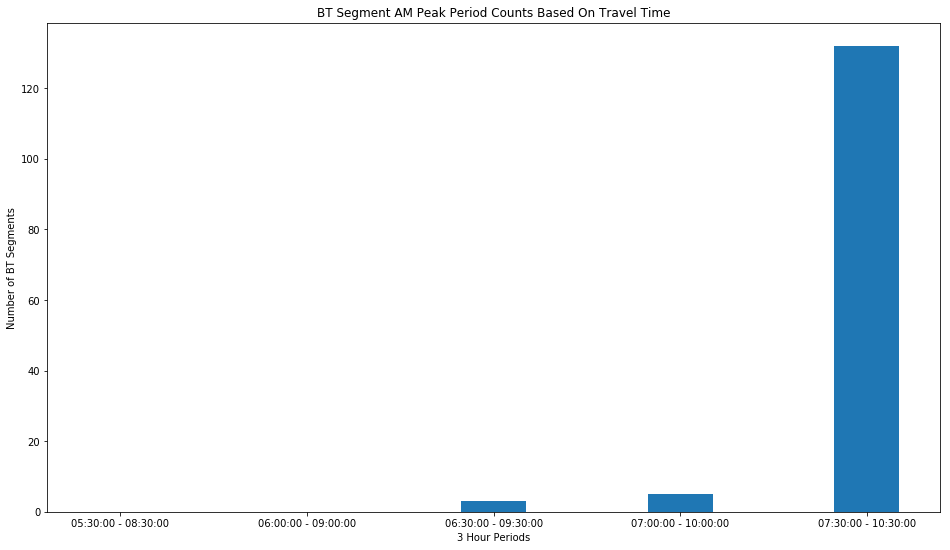

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
am_period_labels = []
am_peak_counts = []
n = 0
while am_period[n + 6] != am_period[-1]:
    am_peak_counts.append(am_peak_list.count(n))
    period = am_period[n] + ' - ' + am_period[n + 6]
    am_period_labels.append(period)
    n += 1
index = np.arange(n)
plt.bar(index, am_peak_counts, 0.35)
plt.xlabel('3 Hour Periods')
plt.ylabel('Number of BT Segments')
plt.xticks(index, am_period_labels)
plt.title("BT Segment AM Peak Period Counts Based On Travel Time")
plt.show()

It is obvious that the peak period across most routes lies within the 7:30AM - 10:30AM period. It might be better show a smaller 1h range to find the exact peak periods.

## Count of PM Peak Periods From Each Route

In [61]:
pm_period = ['14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00', '17:00:00', '17:30:00',
             '18:00:00', '18:30:00', '19:00:00', '19:30:00', '20:00:00']

m = 0
n = 0
route_pm_peaks = []
pm_peak_list = []
# Loop through all routes
for m in range(n_routes):
    analysis_id = routes.analysis_id.values[m]
    pm_max = ['x',0,0,0]
    pm_peak_period = 0
    # Loop through pm_period, stop when out of range
    while pm_period[n + 6] != pm_period[-1]:
        start_time = pm_period[n]
        end_time = pm_period[n + 6]
        sql = pg.SQL('''SELECT report_name, analysis_id, avg(tt) avg_tt
                FROM ryu4.aggr_30min
                WHERE (datetime_bin).time >= {start_time} AND (datetime_bin).time <= {end_time}
                AND analysis_id = {analysis_id} AND weekday NOT IN (0, 6)
                GROUP BY report_name, analysis_id''').format(start_time = pg.Literal(start_time),
                                                        end_time = pg.Literal(end_time), 
                                                        analysis_id = pg.Literal(str(analysis_id)))
        result = pandasql.read_sql(sql, con)
        list_result = list(itertools.chain(result.report_name.values, result.analysis_id.values, result.avg_tt.values))
        list_result.append(n)
        if (list_result[2] > pm_max[2]):
            pm_max = list_result
        n += 1
    route_pm_peaks.append(pm_max)
    pm_peak_list.append(pm_max[3])
    n = 0

140


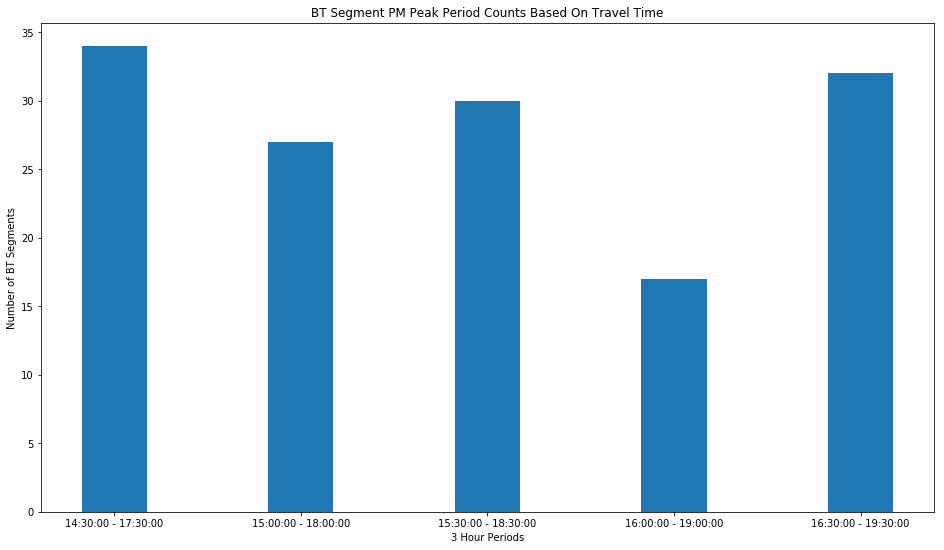

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
pm_period_labels = []
pm_peak_counts = []
n = 0
print(len(pm_peak_list))
while pm_period[n + 6] != pm_period[-1]:
    pm_peak_counts.append(pm_peak_list.count(n))
    period = pm_period[n] + ' - ' + pm_period[n + 6]
    pm_period_labels.append(period)
    n += 1
index = np.arange(n)
plt.bar(index, pm_peak_counts, 0.35)
plt.xlabel('3 Hour Periods')
plt.ylabel('Number of BT Segments')
plt.xticks(index, pm_period_labels)
plt.title("BT Segment PM Peak Period Counts Based On Travel Time")
plt.show()

It is not very obvious when the PM peak period occurs. Although 2:30PM-5:30PM is the largest, the counts may be skewed since majority of the counts could like within the later side of the period. Again, it may be better to lower the range to 1h to find out the exact periods.